In [1]:
import mcmc_utils

In [2]:
import surp
import vice
import numpy as np

import matplotlib.pyplot as plt

from surp.gce_math import Z_to_MH, MH_to_Z, calc_y

/users/PAS2232/aeyobd/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [3]:
vice.yields.ccsne.settings["c"] = 0

# Prior models

In [5]:
lin_model = mcmc_utils.Linear(beta0=[3e-4, 3e-4], beta1=[0, 3e-4], log_sigma=[-20, 1])
exp_model = mcmc_utils.Exponential(beta0=[3e-4, 3e-3], beta1=[0,2e-2], log_sigma=[-20, 1])
quad_model = mcmc_utils.Quadratic(beta0=[3e-4, 3e-4], beta1=[0, 3e-4], beta2=[0, 3e-4], log_sigma=[-20, 1])

In [6]:
N = 3_000
discard = 300

100%|██████████| 1000/1000 [00:10<00:00, 96.79it/s]


$\beta_0$ = 2.64e-04 + 2.91e-04 - 2.84e-04
$\beta_1$ = -3.91e-05 + 2.98e-04 - 2.99e-04
$\log(\sigma)$ = -2.00e+01 + 9.87e-01 - 9.96e-01


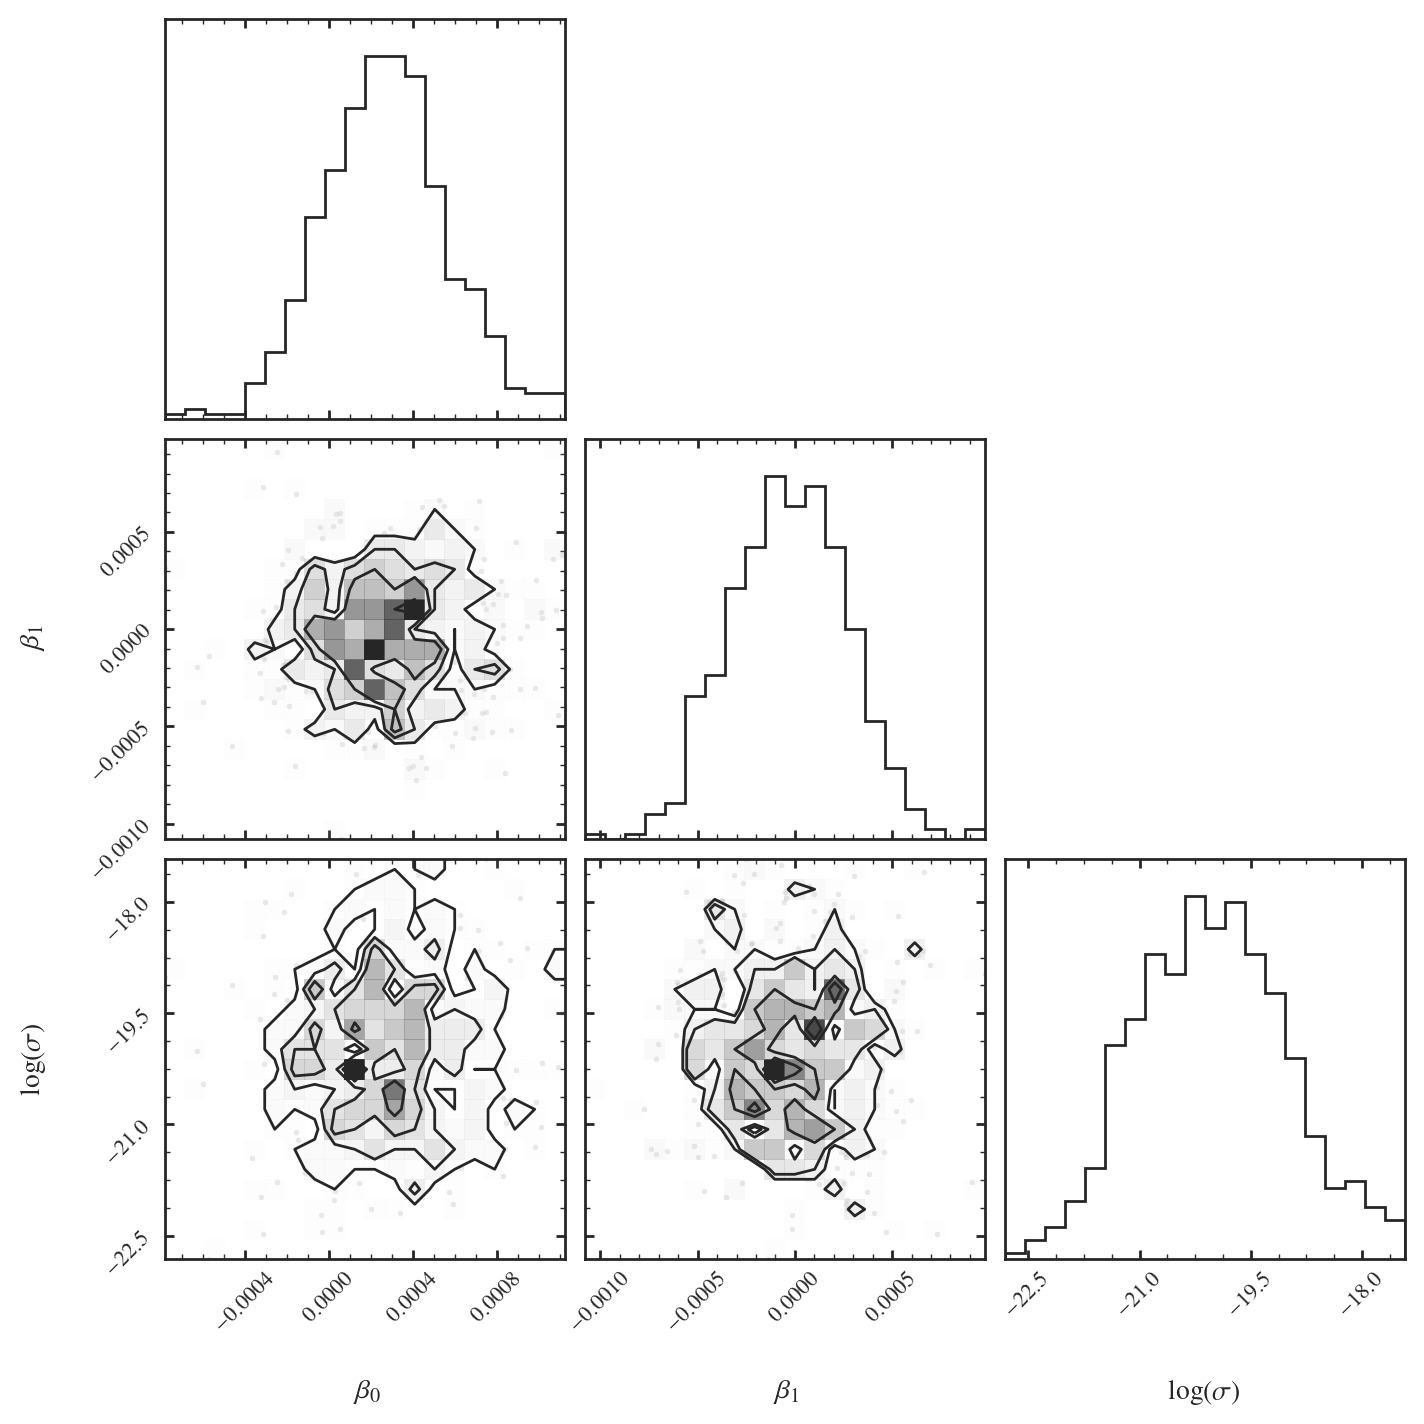

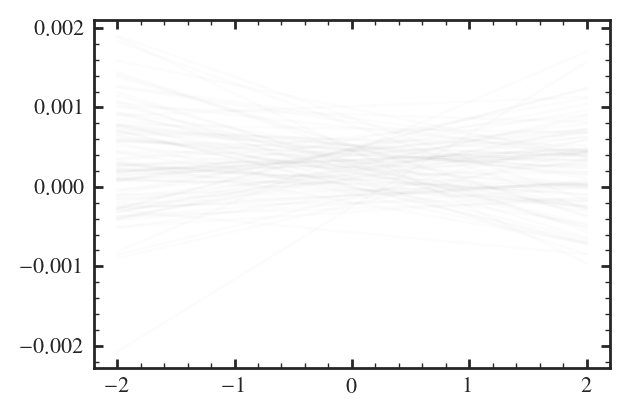

In [7]:
mcmc_utils.plot_prior(lin_model)

100%|██████████| 1000/1000 [00:10<00:00, 97.11it/s]


$\beta_0$ = 6.72e-04 + 3.17e-03 - 2.99e-03
$\beta_1$ = -4.71e-04 + 2.05e-02 - 2.12e-02
$\log(\sigma)$ = -1.99e+01 + 8.88e-01 - 8.78e-01


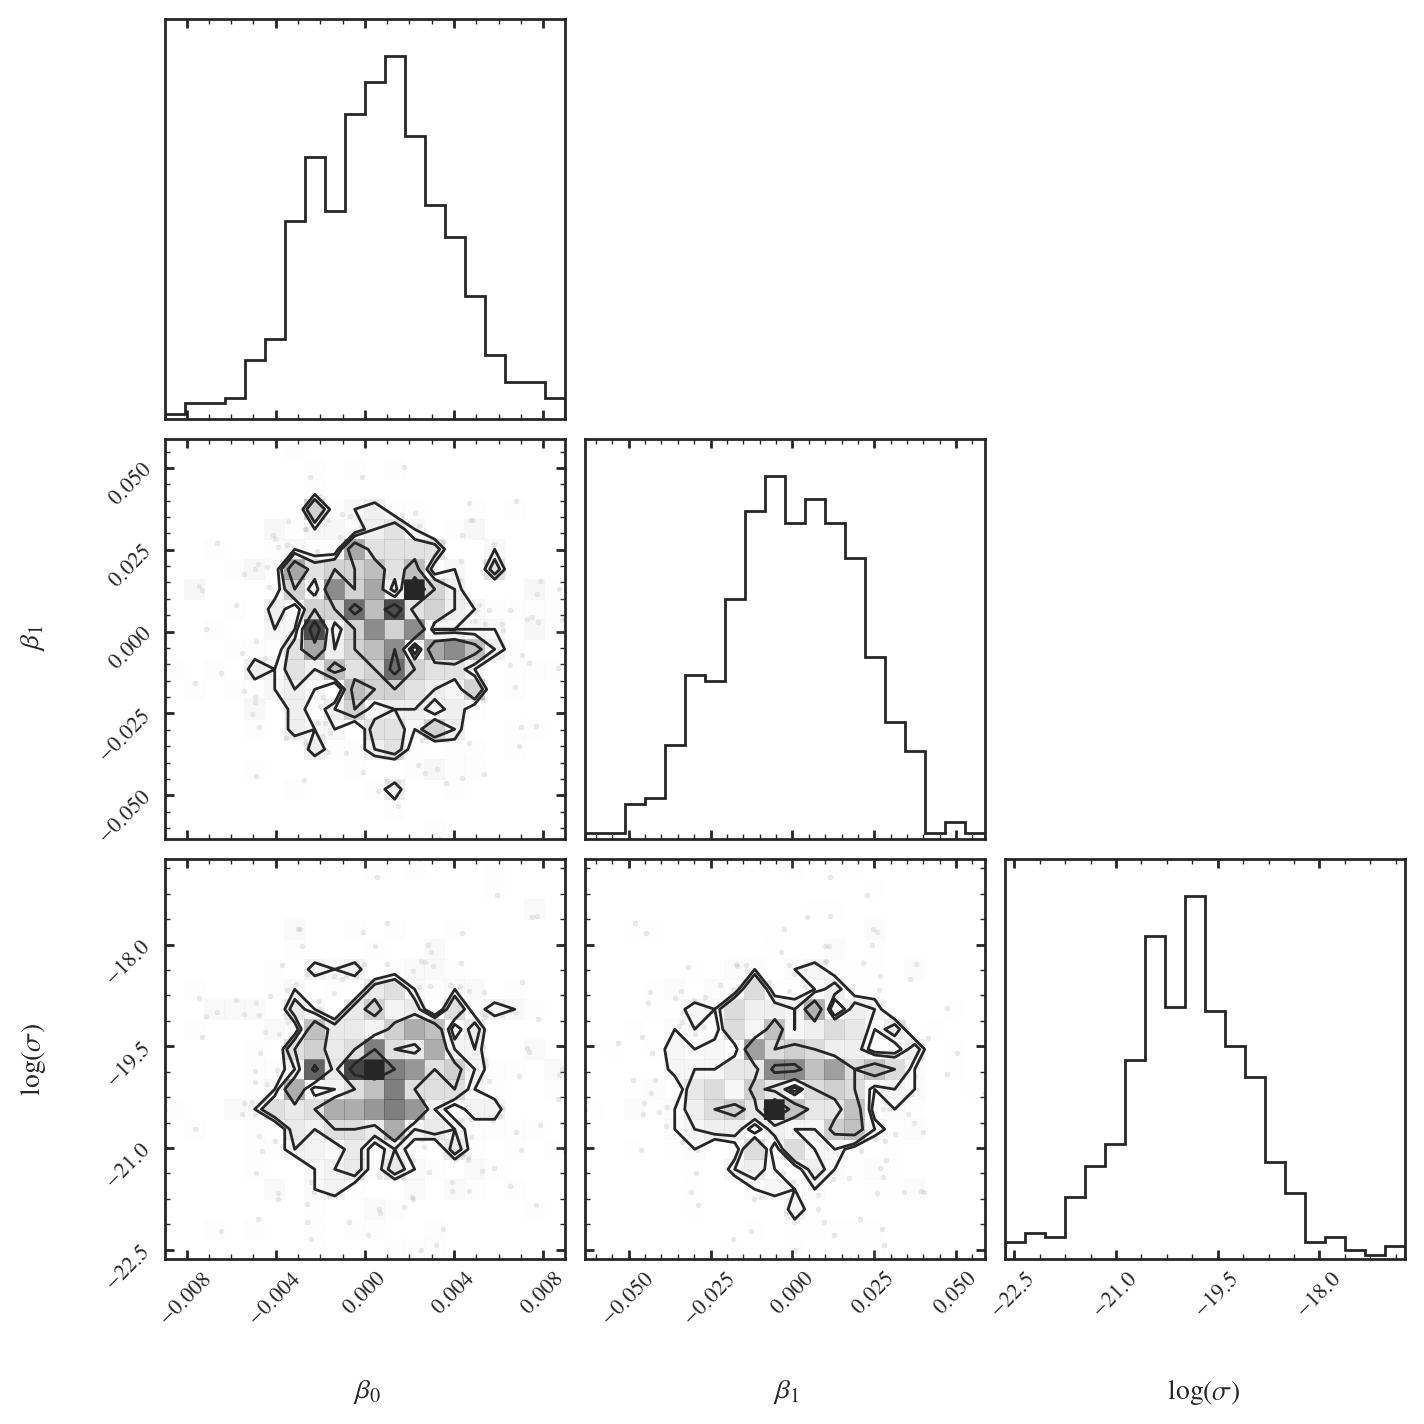

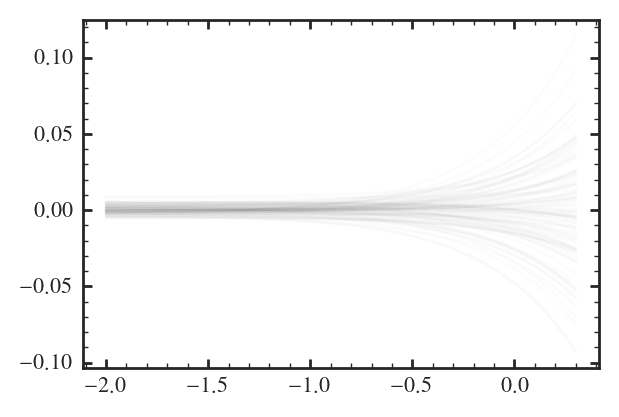

In [8]:
mcmc_utils.plot_prior(exp_model, xlims=(-2, 0.3))

100%|██████████| 1000/1000 [00:11<00:00, 83.37it/s]


$\beta_0$ = 2.81e-04 + 2.72e-04 - 2.91e-04
$\beta_1$ = -6.76e-06 + 2.89e-04 - 3.12e-04
$\beta_2$ = 4.11e-05 + 3.18e-04 - 3.06e-04
$\log(\sigma)$ = -2.00e+01 + 9.16e-01 - 1.01e+00


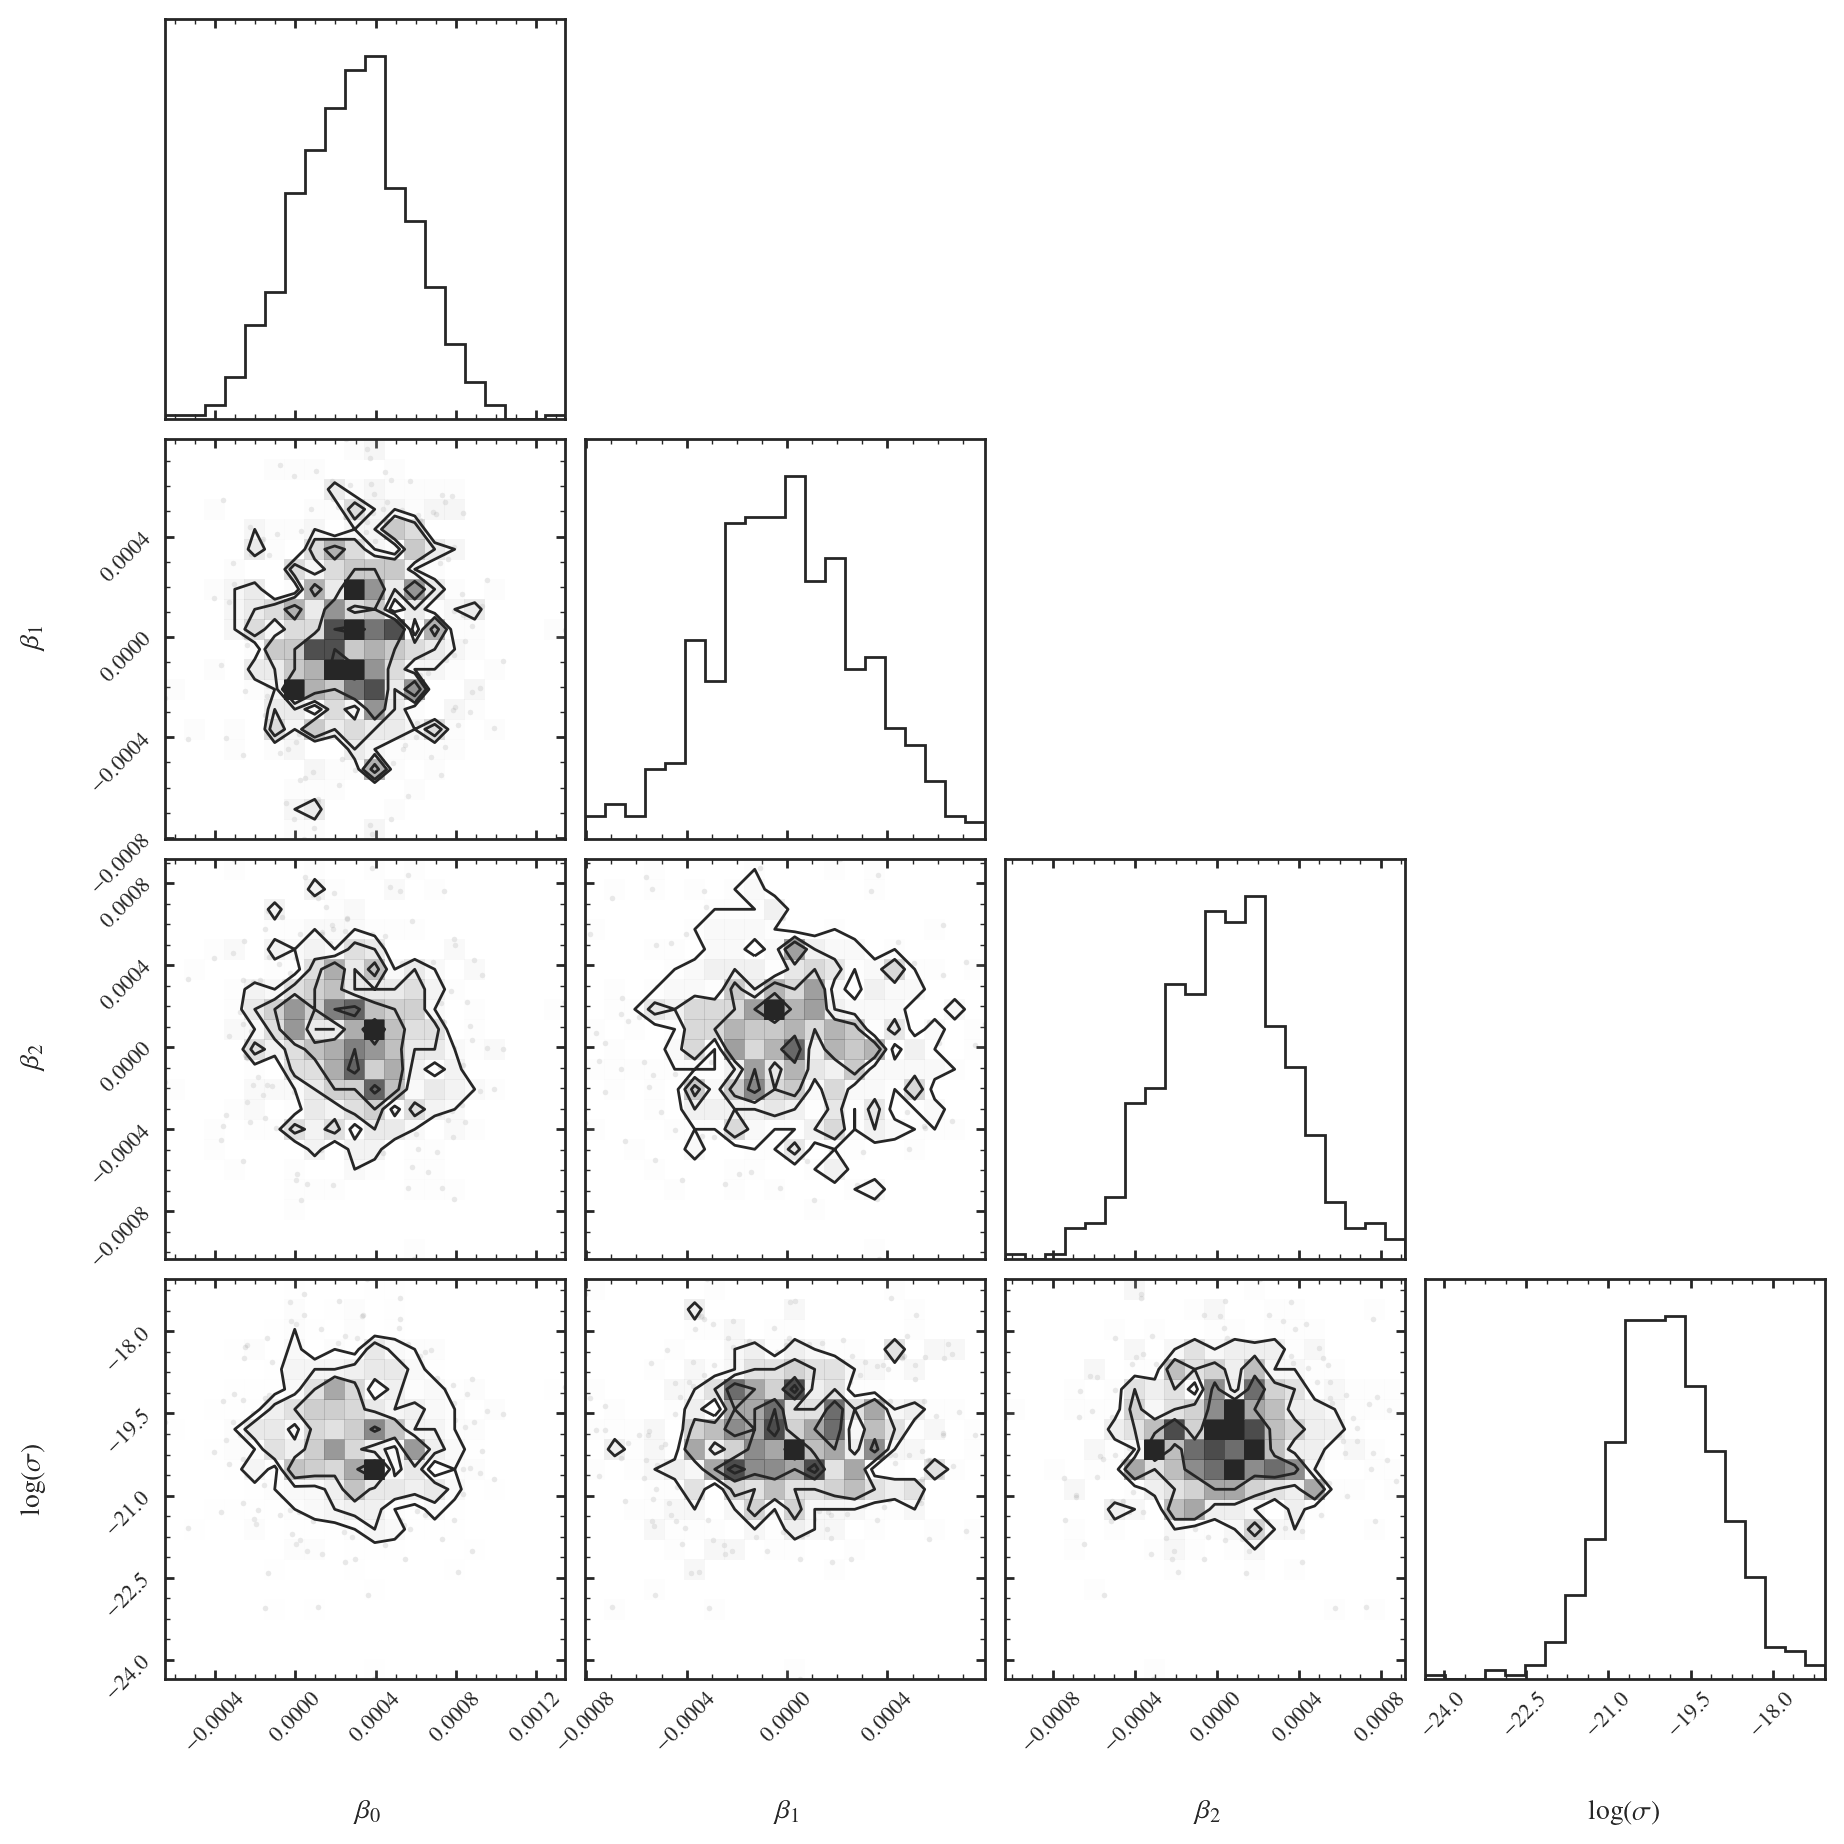

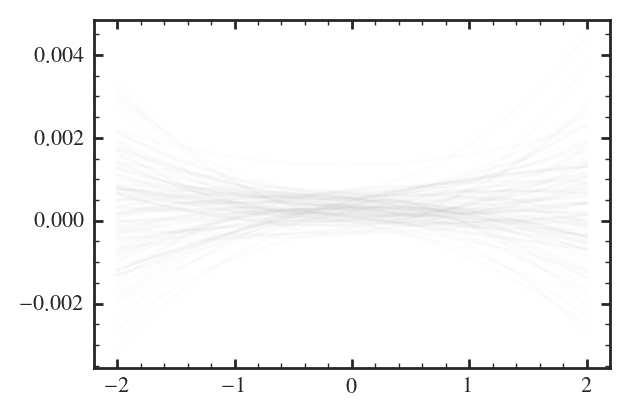

In [9]:
mcmc_utils.plot_prior(quad_model)

# Fit to the yield tables

In [10]:
def get_yield_table(study):
    y1, m1, z1 = vice.yields.agb.grid("c", study=study)
    mh1 = Z_to_MH(z1)
    vice.yields.agb.settings["c"] = vice.yields.agb.interpolator("c", study=study)
    y_c_agb1 = np.array([calc_y(z) for z in z1])

    return mh1, y_c_agb1, None, None

In [11]:
obs = get_yield_table("cristallo11")

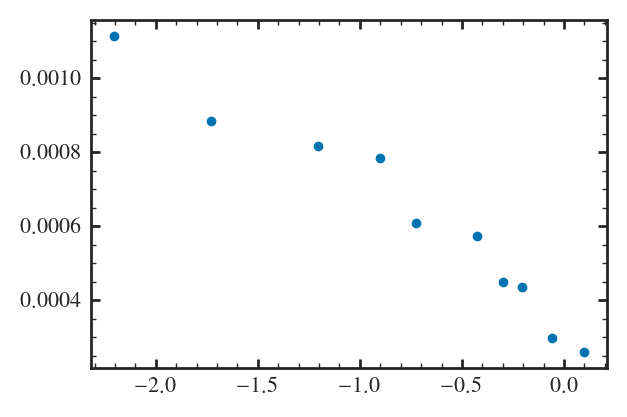

In [12]:
plt.scatter(obs[0], obs[1])

100%|██████████| 3000/3000 [00:09<00:00, 307.64it/s]


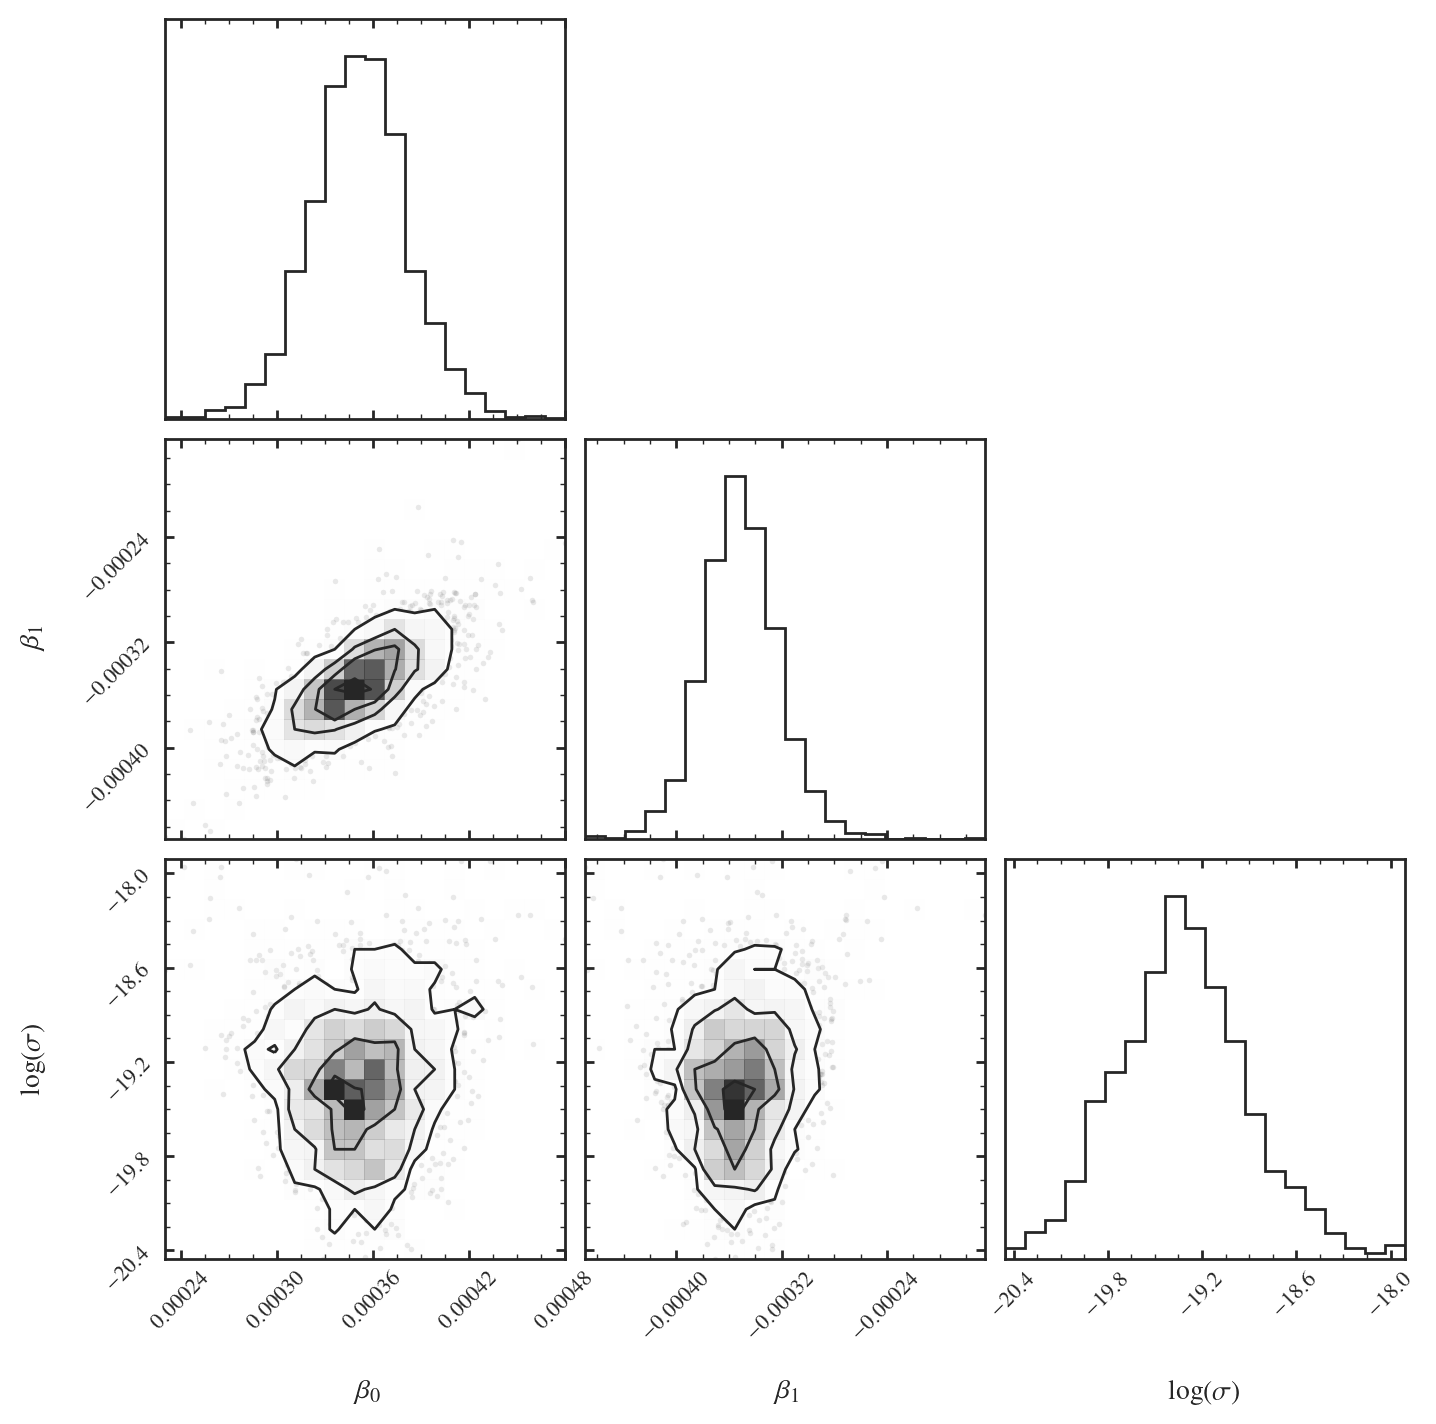

In [13]:
samples = mcmc_utils.run_mcmc(lin_model, obs, N=N, discard=discard)

$\beta_0$ = 3.51e-04 + 2.97e-05 - 2.80e-05
$\beta_1$ = -3.52e-04 + 2.64e-05 - 2.83e-05
$\log(\sigma)$ = -1.93e+01 + 4.19e-01 - 3.99e-01


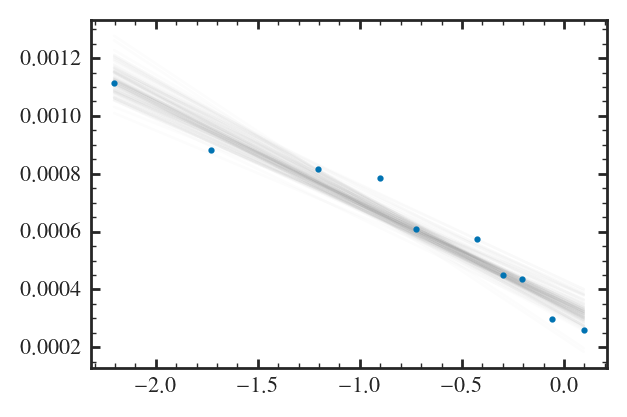

In [14]:
mcmc_utils.plot_posterior(lin_model, obs, samples)

100%|██████████| 3000/3000 [00:12<00:00, 249.43it/s]


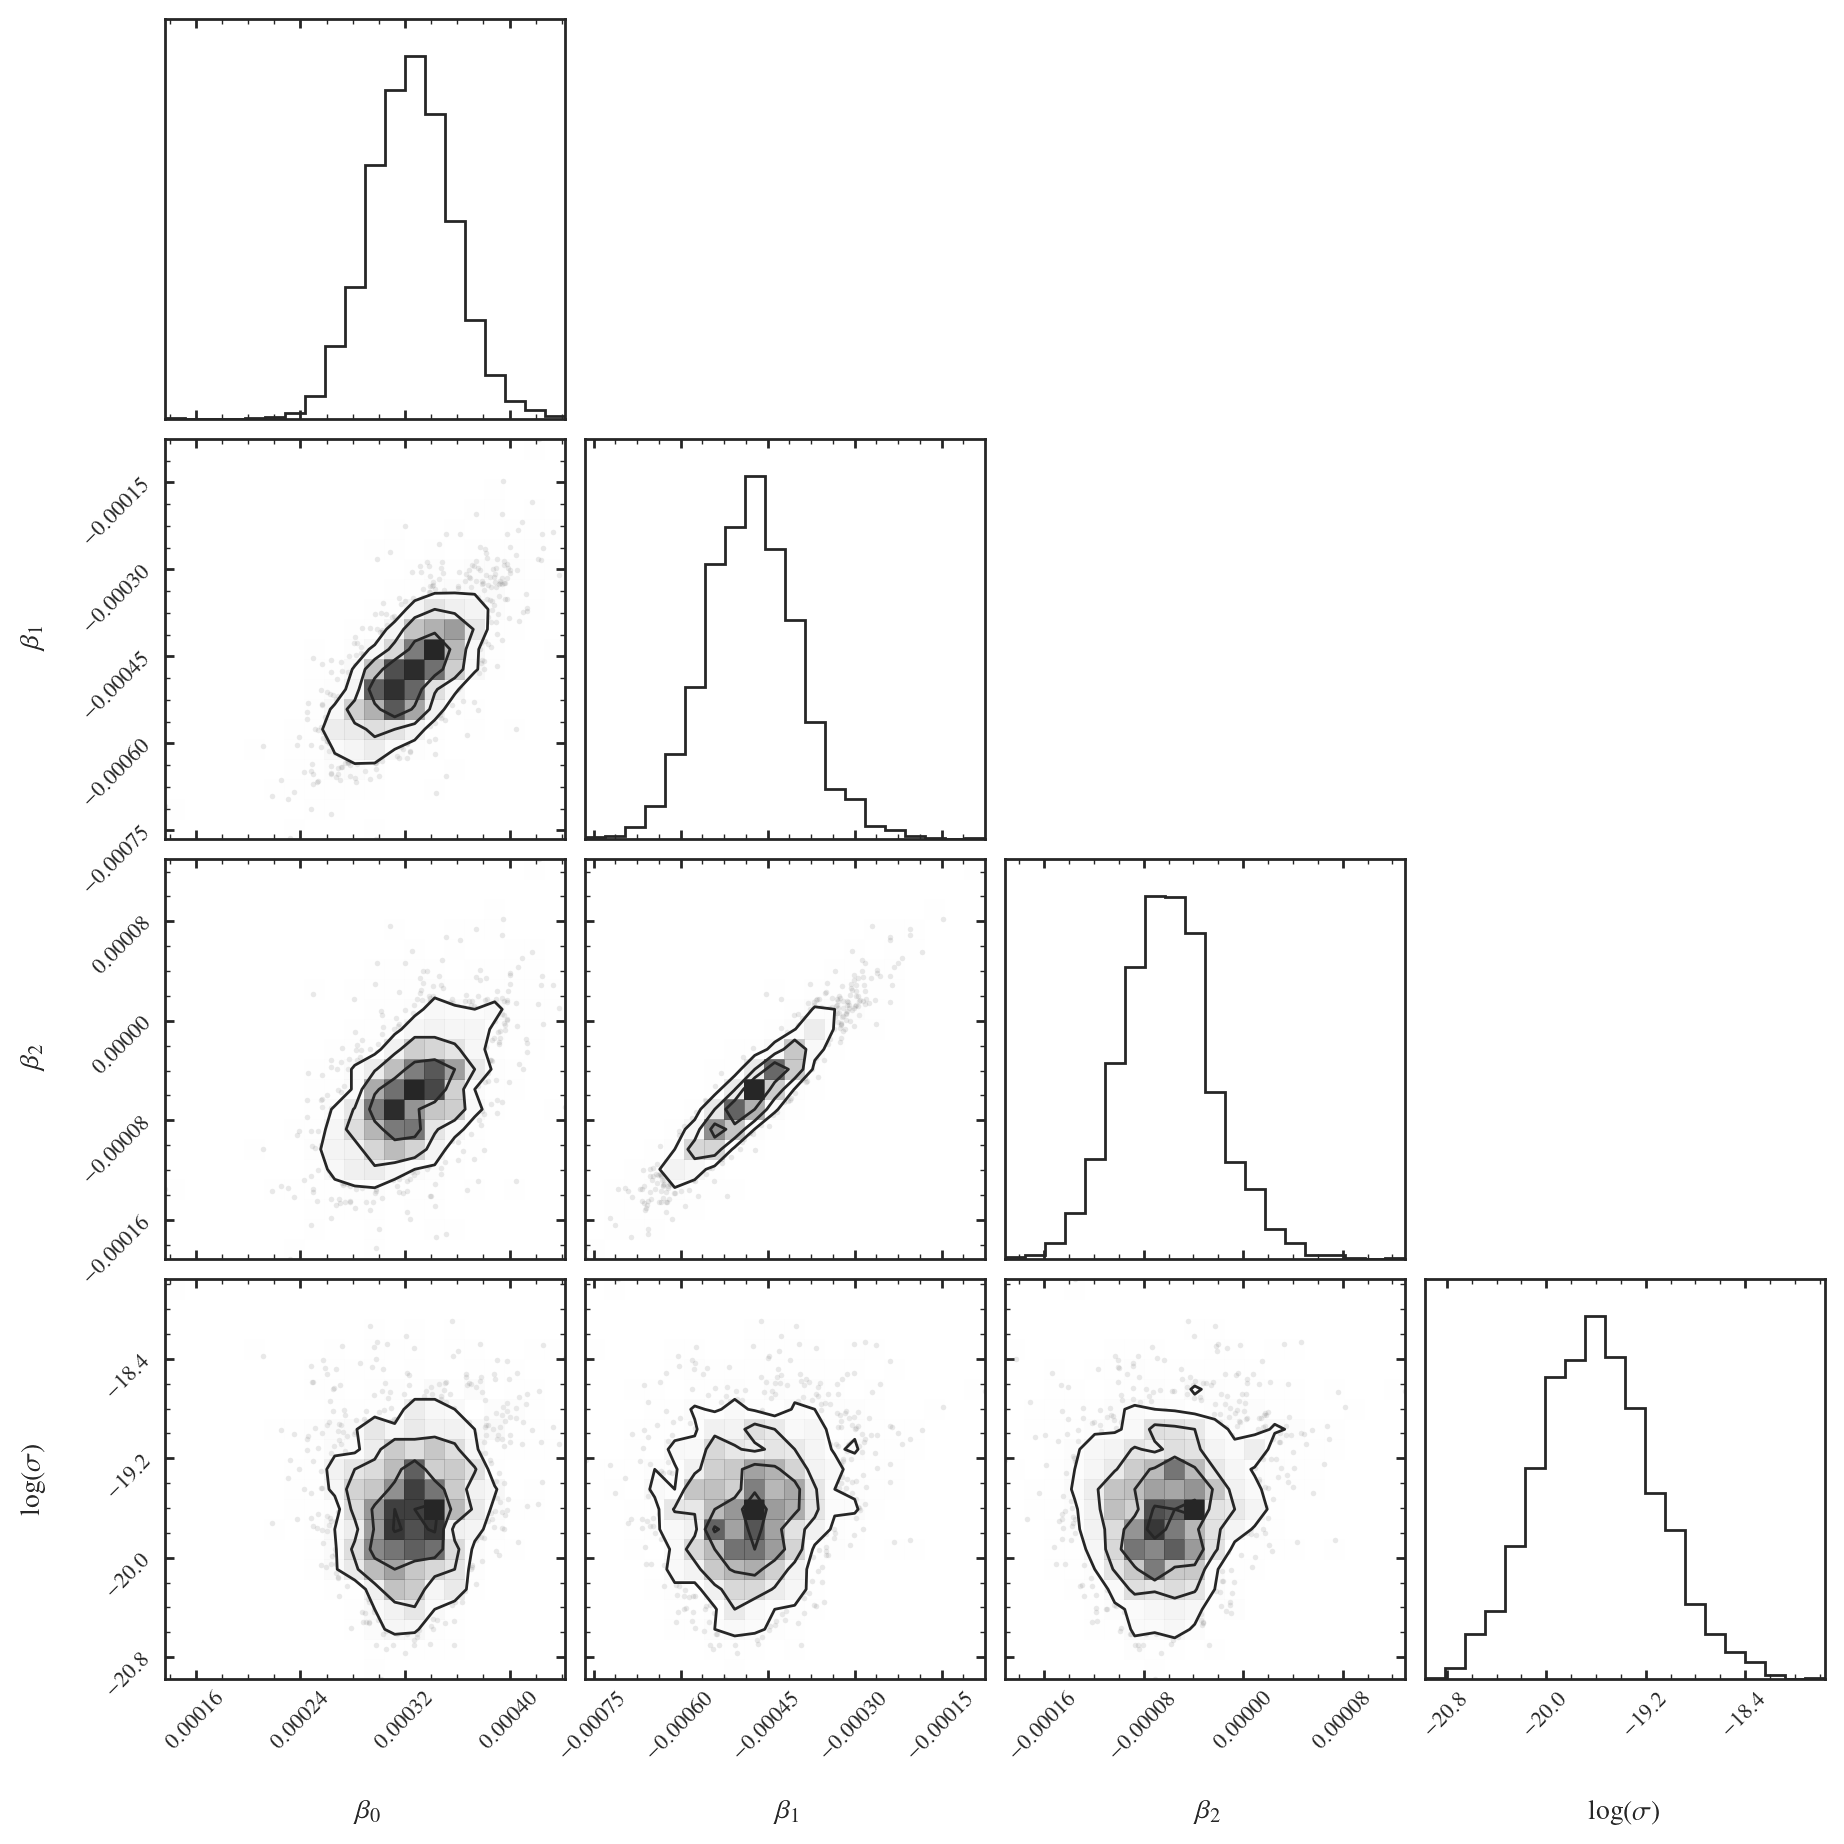

In [15]:
samples = mcmc_utils.run_mcmc(quad_model, obs, N=N, discard=discard)

$\beta_0$ = 3.25e-04 + 3.10e-05 - 3.01e-05
$\beta_1$ = -4.78e-04 + 7.74e-05 - 7.69e-05
$\beta_2$ = -6.14e-05 + 3.59e-05 - 3.50e-05
$\log(\sigma)$ = -1.96e+01 + 4.63e-01 - 4.80e-01


(-0.0003, 0.002)

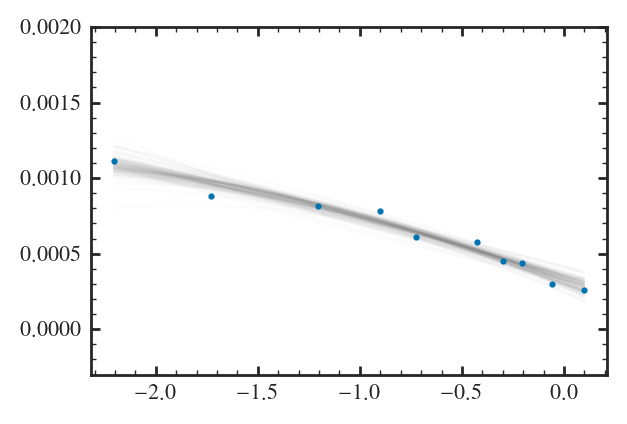

In [16]:
mcmc_utils.plot_posterior(quad_model, obs, samples)
plt.ylim(-0.3e-3, 2e-3)

100%|██████████| 3000/3000 [00:09<00:00, 302.06it/s]


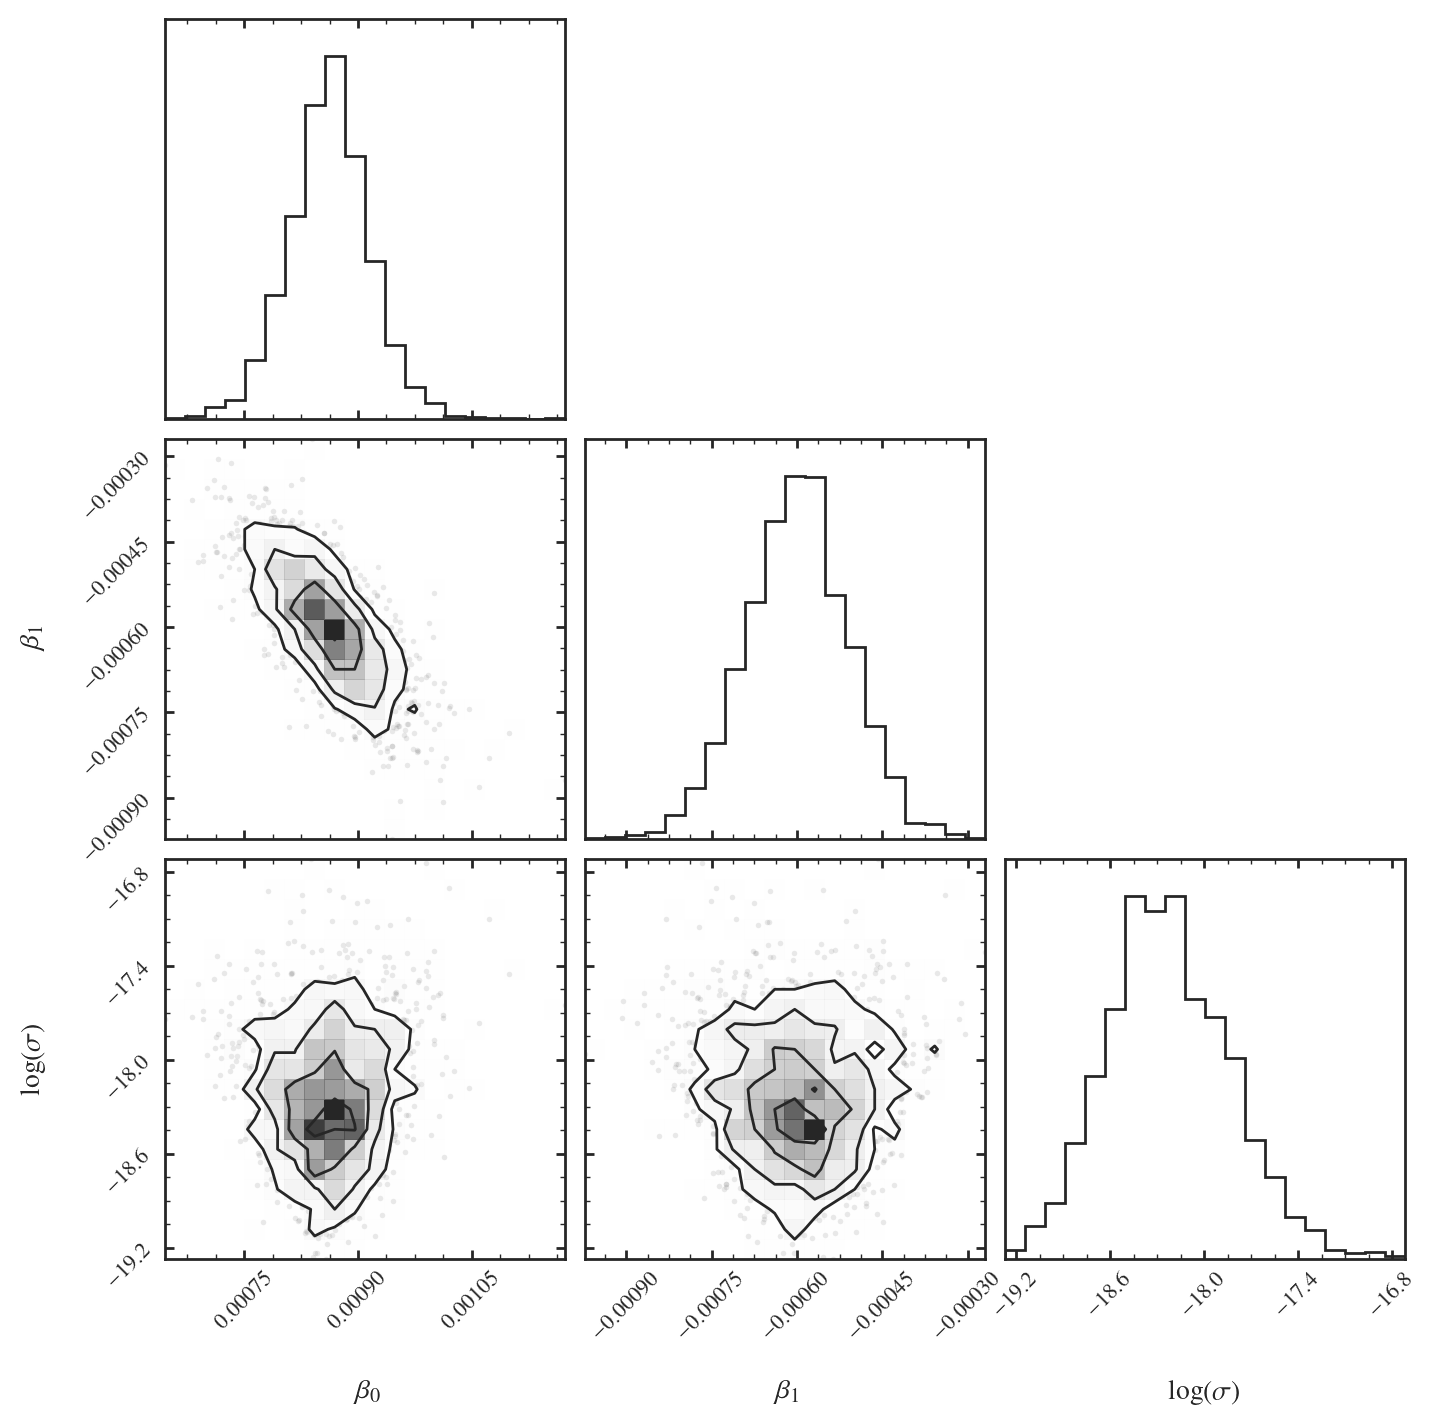

In [17]:
samples = mcmc_utils.run_mcmc(exp_model, obs, N=N, discard=discard)

$\beta_0$ = 8.63e-04 + 5.15e-05 - 4.91e-05
$\beta_1$ = -5.98e-04 + 9.30e-05 - 8.93e-05
$\log(\sigma)$ = -1.83e+01 + 3.68e-01 - 4.17e-01


(-0.001, 0.002)

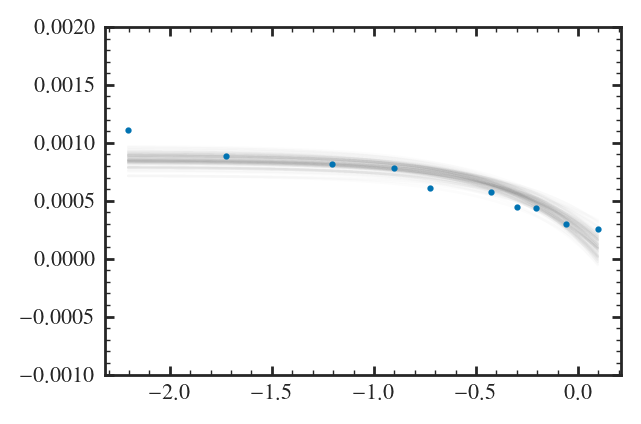

In [18]:
mcmc_utils.plot_posterior(exp_model, obs, samples)
plt.ylim(-1e-3, 2e-3)

# V13

In [19]:
obs = get_yield_table("ventura13")

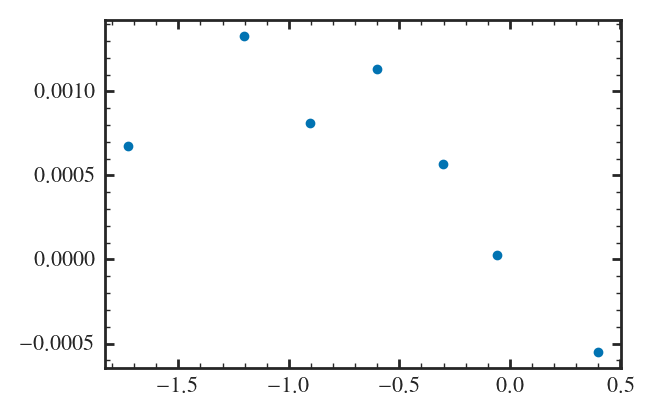

In [20]:
plt.scatter(obs[0], obs[1])

100%|██████████| 3000/3000 [00:10<00:00, 278.23it/s]


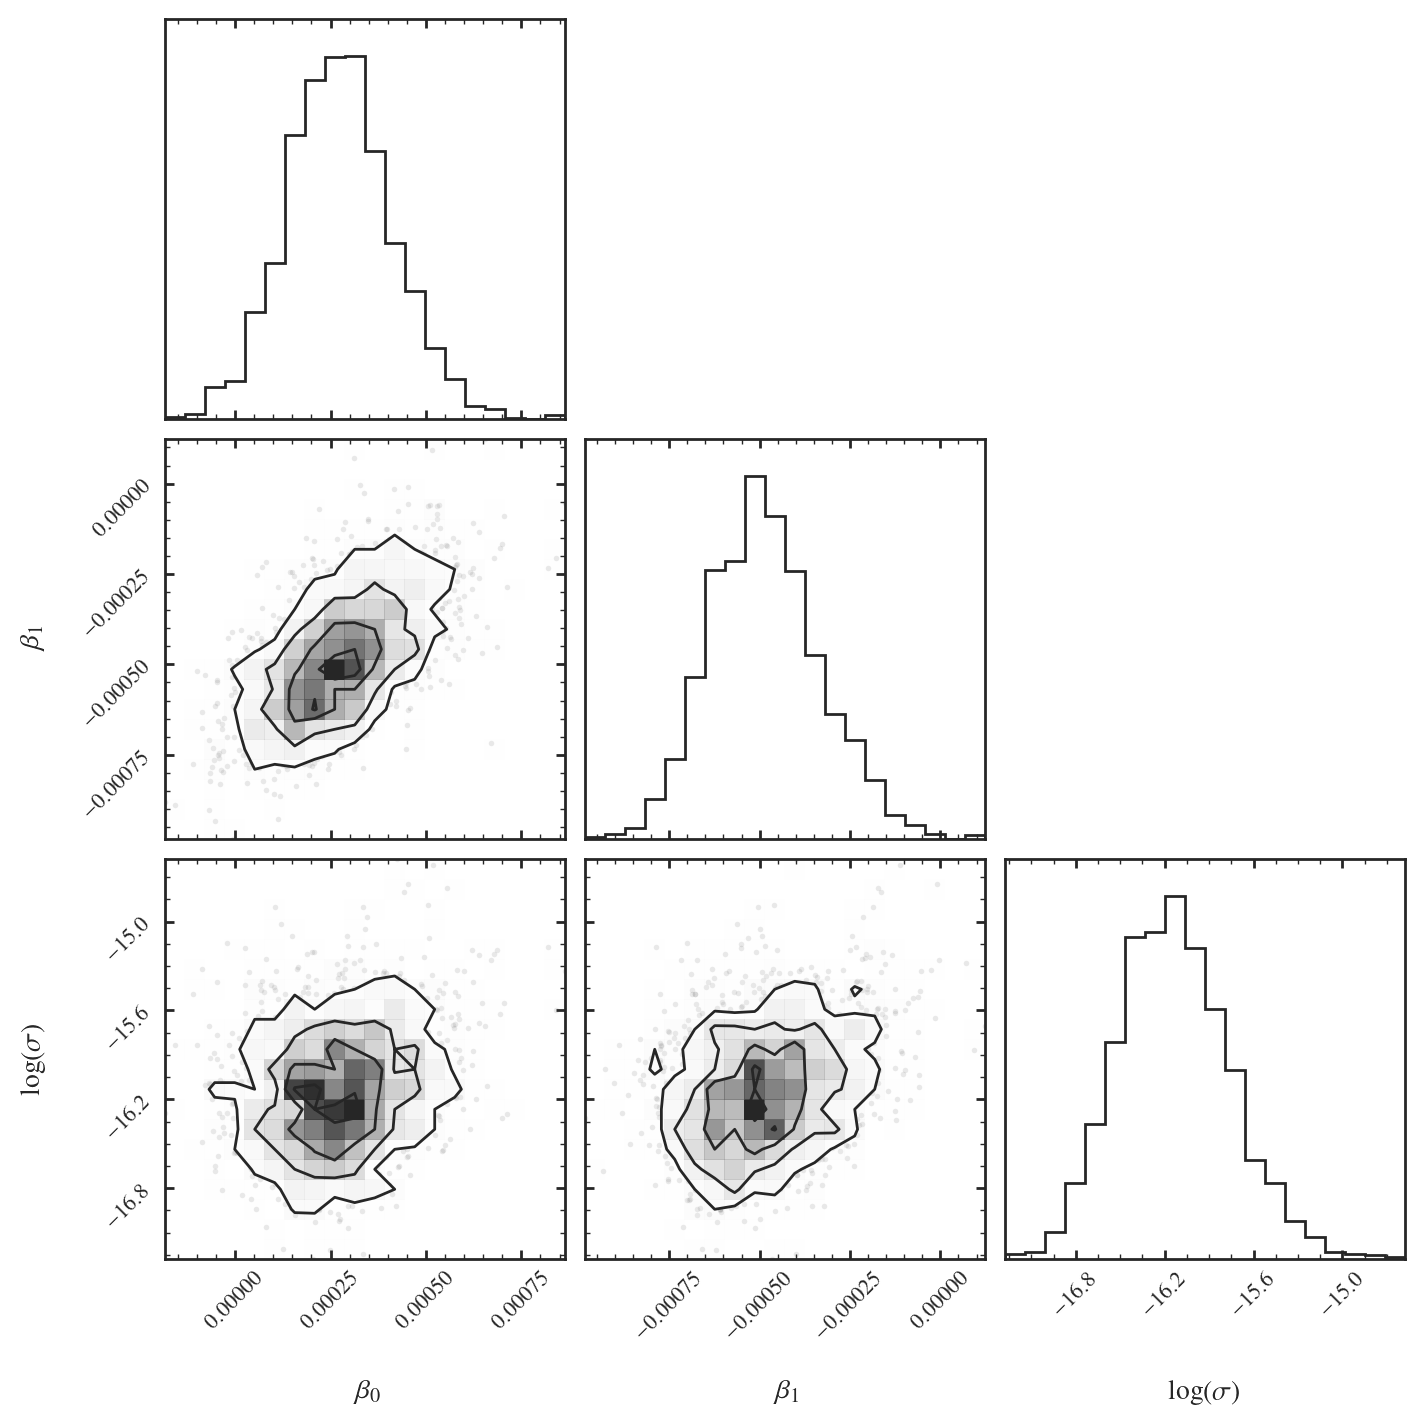

In [21]:
samples = mcmc_utils.run_mcmc(lin_model, obs, N=N, discard=discard)

$\beta_0$ = 2.71e-04 + 1.31e-04 - 1.33e-04
$\beta_1$ = -4.92e-04 + 1.39e-04 - 1.57e-04
$\log(\sigma)$ = -1.62e+01 + 3.61e-01 - 3.95e-01


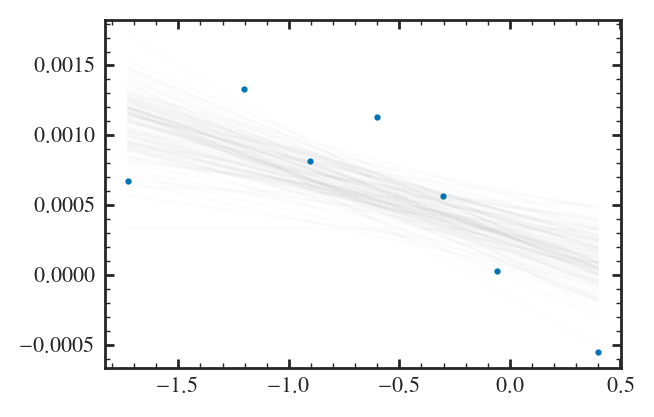

In [22]:
mcmc_utils.plot_posterior(lin_model, obs, samples)

100%|██████████| 3000/3000 [00:12<00:00, 243.73it/s]


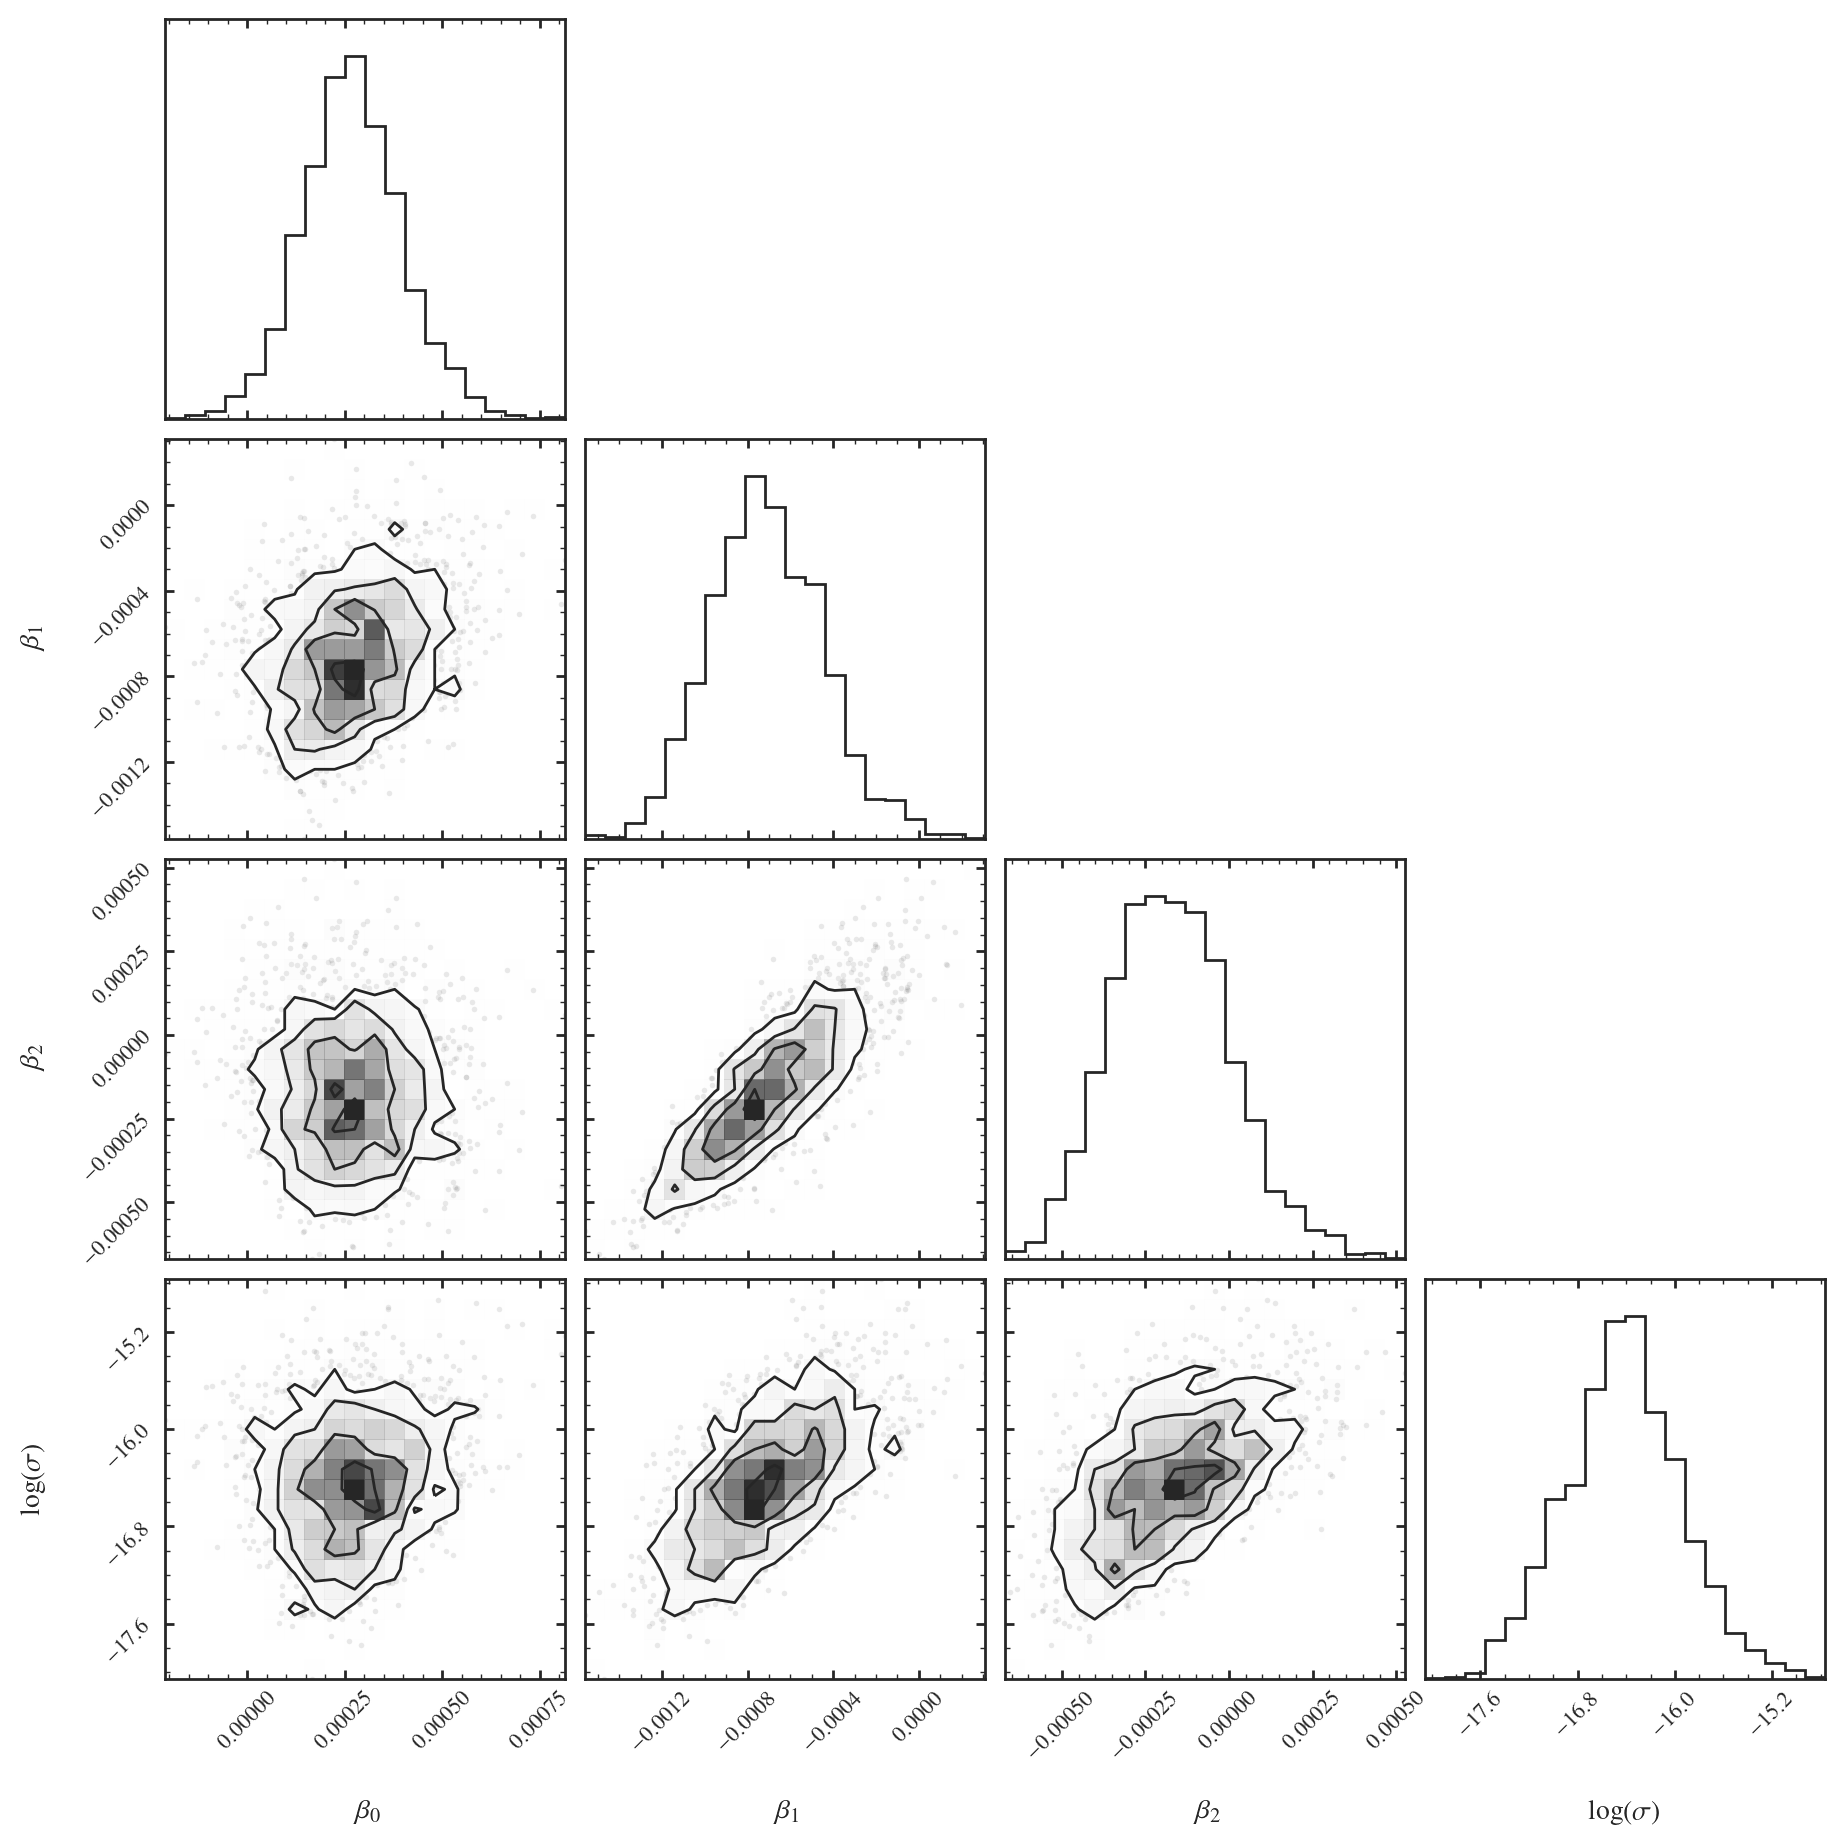

In [23]:
samples = mcmc_utils.run_mcmc(quad_model, obs, N=N, discard=discard)

$\beta_0$ = 2.66e-04 + 1.22e-04 - 1.20e-04
$\beta_1$ = -7.22e-04 + 2.45e-04 - 2.70e-04
$\beta_2$ = -1.79e-04 + 1.72e-04 - 1.81e-04
$\log(\sigma)$ = -1.64e+01 + 4.89e-01 - 4.65e-01


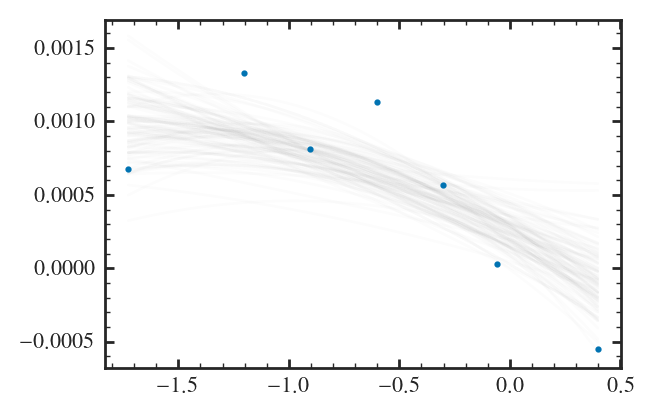

In [24]:
mcmc_utils.plot_posterior(quad_model, obs, samples)

100%|██████████| 3000/3000 [00:09<00:00, 310.20it/s]


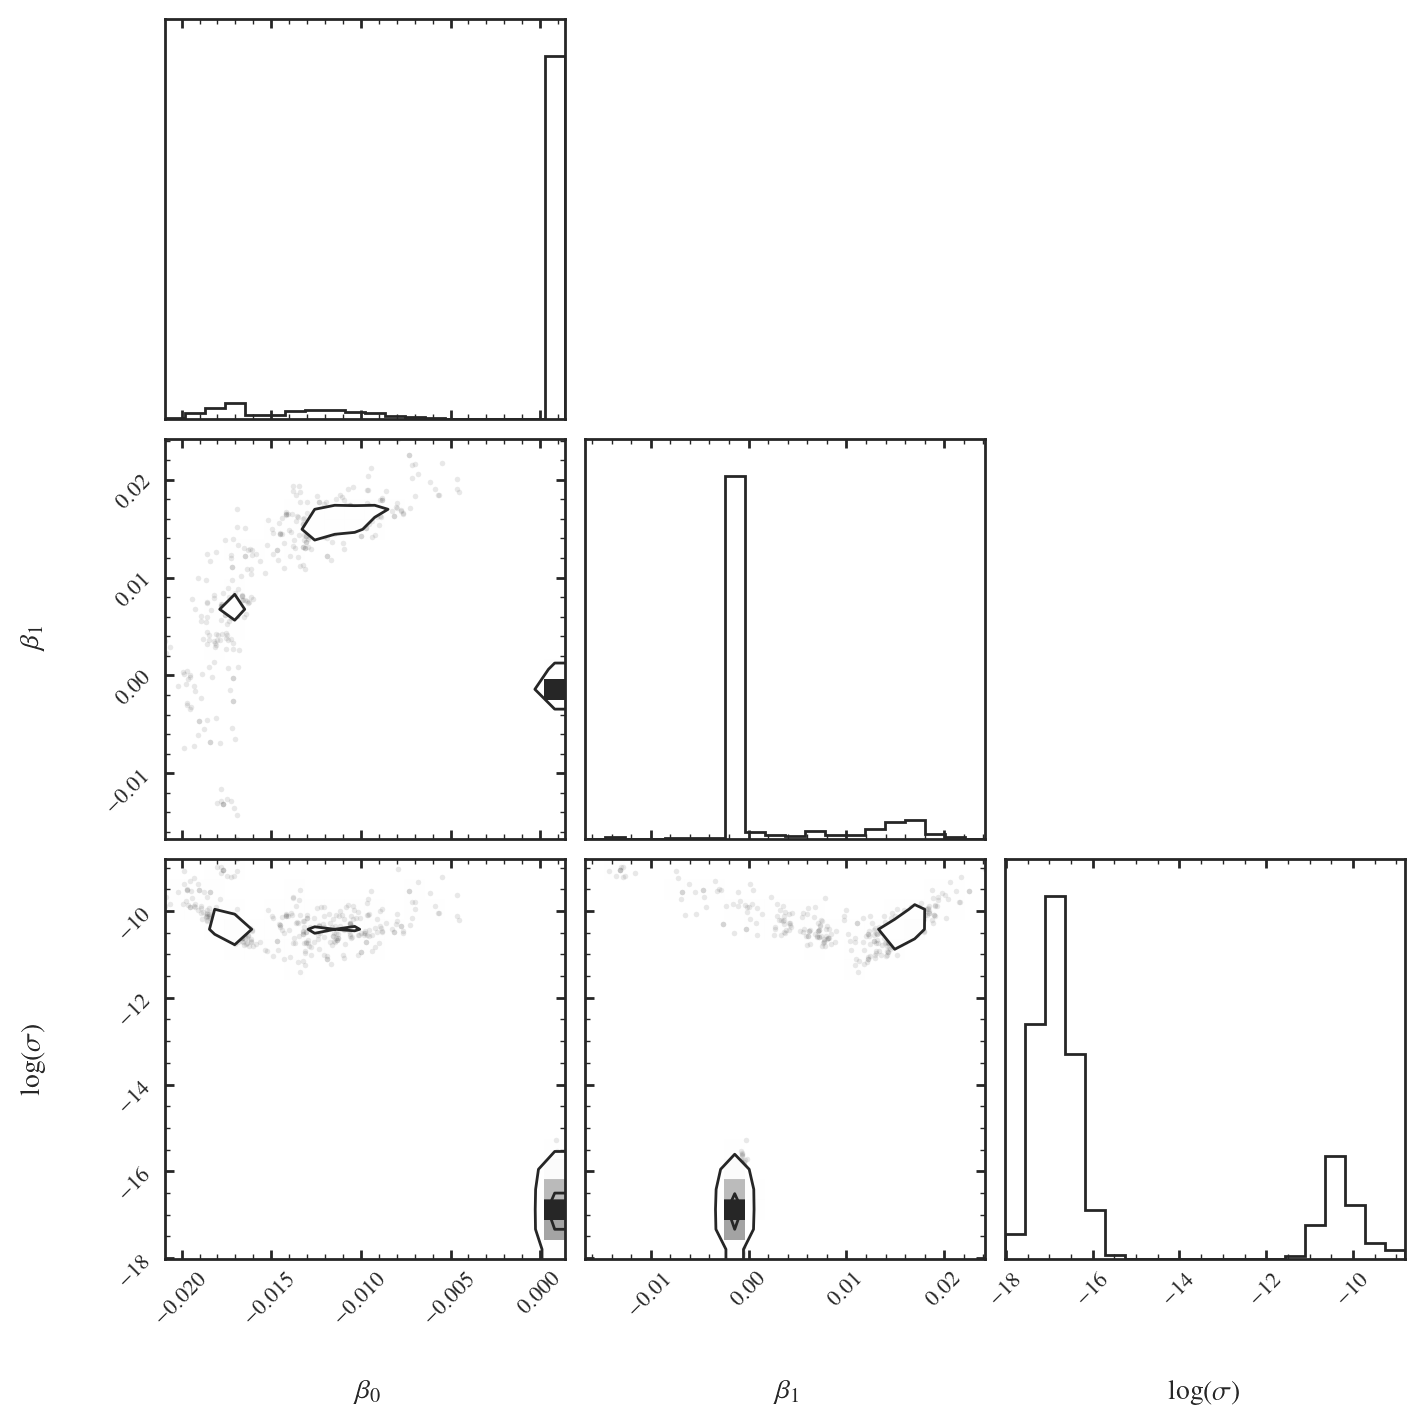

In [25]:
samples = mcmc_utils.run_mcmc(exp_model, obs, N=N, discard=discard)

$\beta_0$ = 9.47e-04 + 1.15e-02 - 1.17e-04
$\beta_1$ = -6.36e-04 + 1.15e-04 - 4.83e-03
$\log(\sigma)$ = -1.67e+01 + 4.71e-01 - 6.13e+00


(-0.001, 0.002)

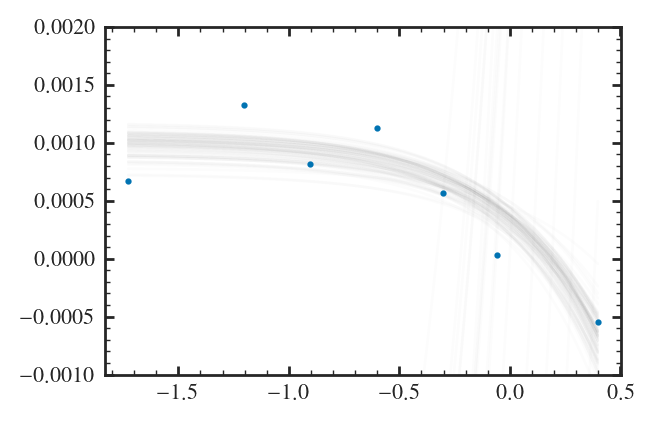

In [26]:
mcmc_utils.plot_posterior(exp_model, obs, samples)
plt.ylim(-1e-3, 2e-3)

# K16

In [27]:
obs = get_yield_table("karakas16")

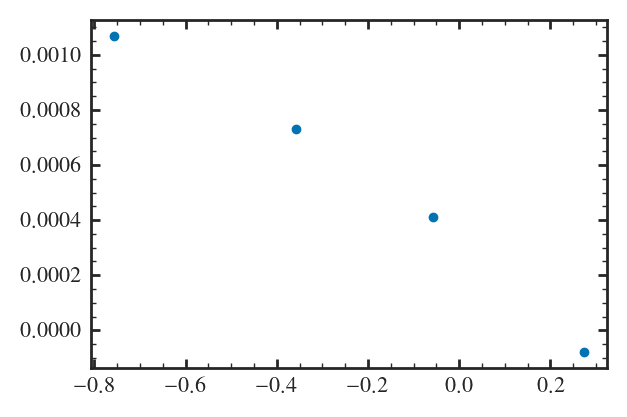

In [28]:
plt.scatter(obs[0], obs[1])

100%|██████████| 3000/3000 [00:09<00:00, 313.00it/s]


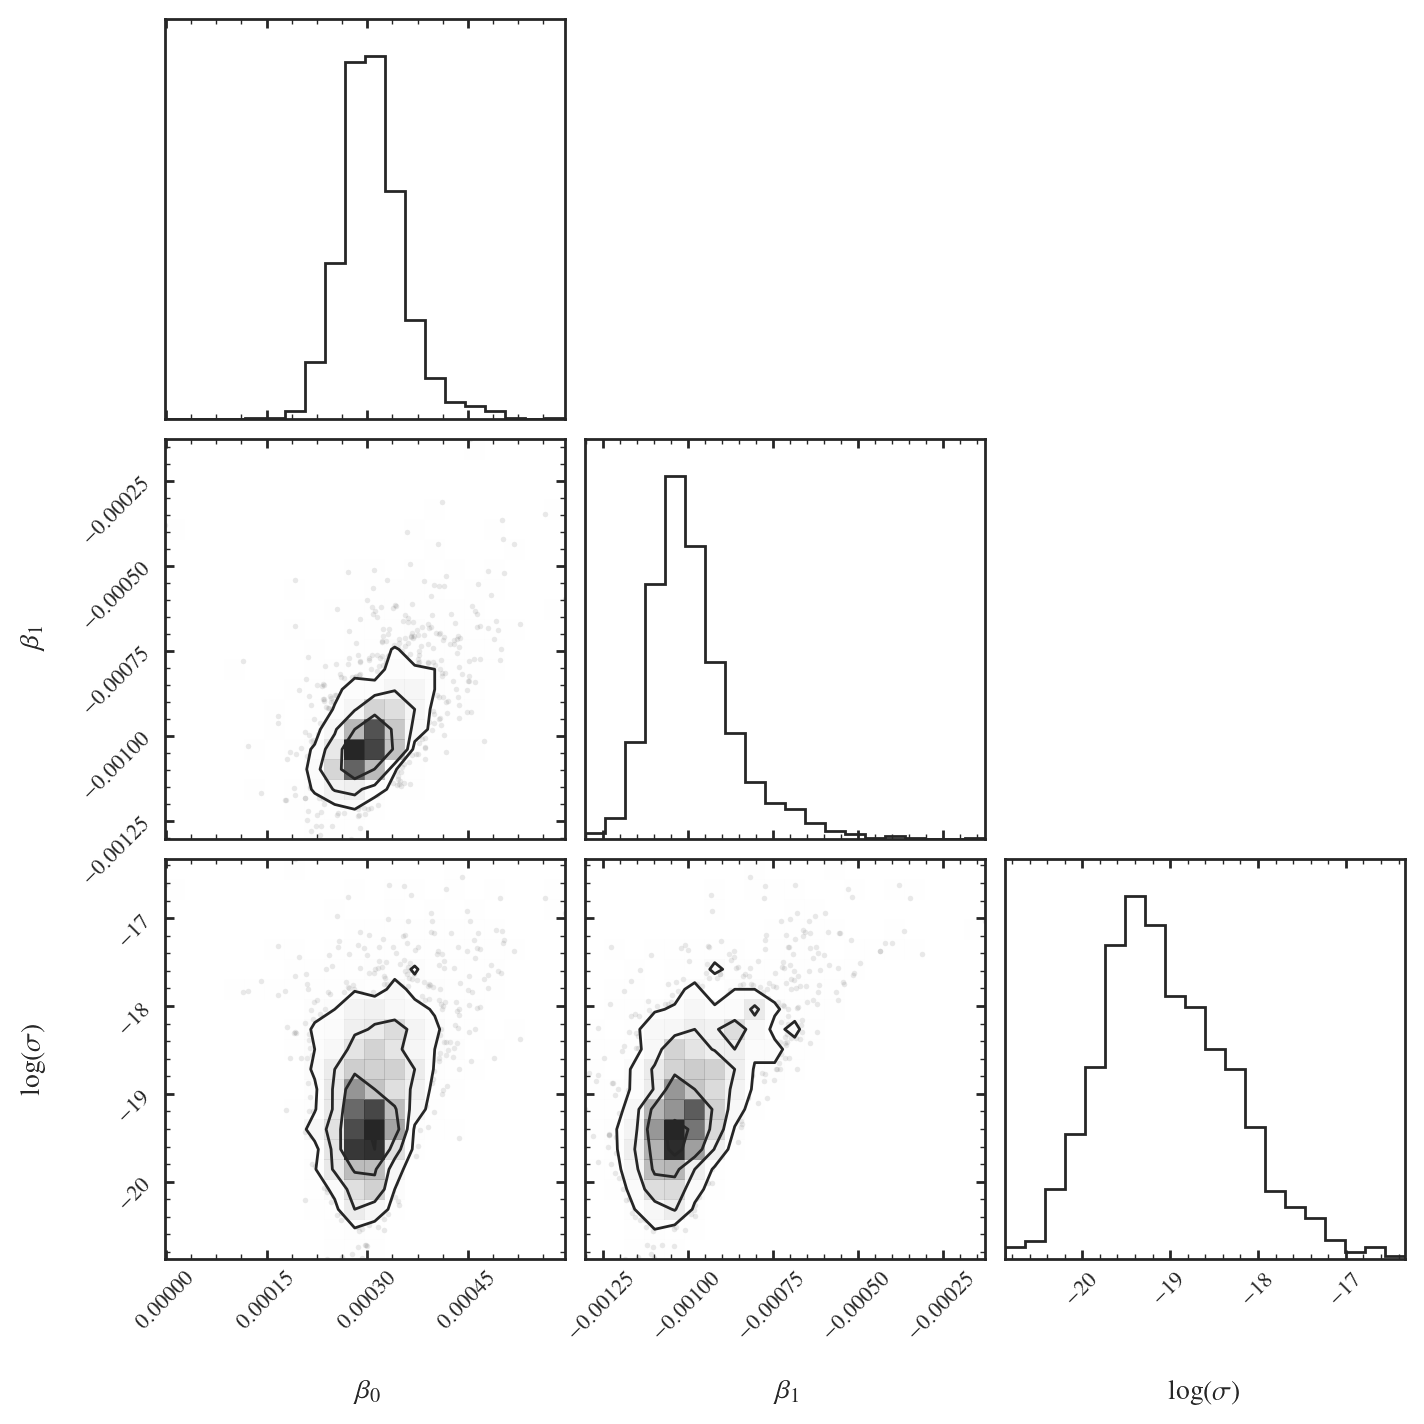

In [29]:
samples = mcmc_utils.run_mcmc(lin_model, obs, N=N, discard=discard)

$\beta_0$ = 3.03e-04 + 3.77e-05 - 4.63e-05
$\beta_1$ = -1.01e-03 + 9.01e-05 - 1.30e-04
$\log(\sigma)$ = -1.91e+01 + 6.19e-01 - 8.25e-01


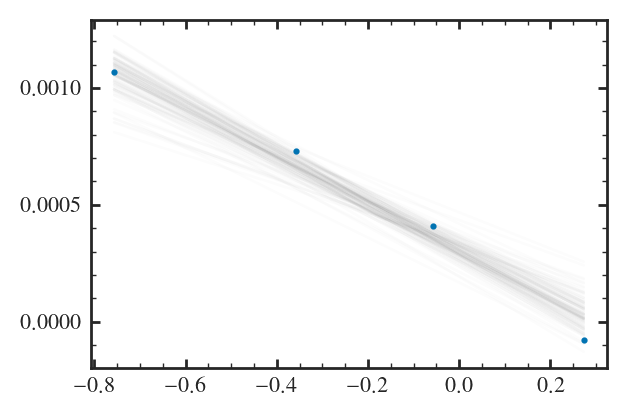

In [30]:
mcmc_utils.plot_posterior(lin_model, obs, samples)

100%|██████████| 3000/3000 [00:12<00:00, 247.93it/s]


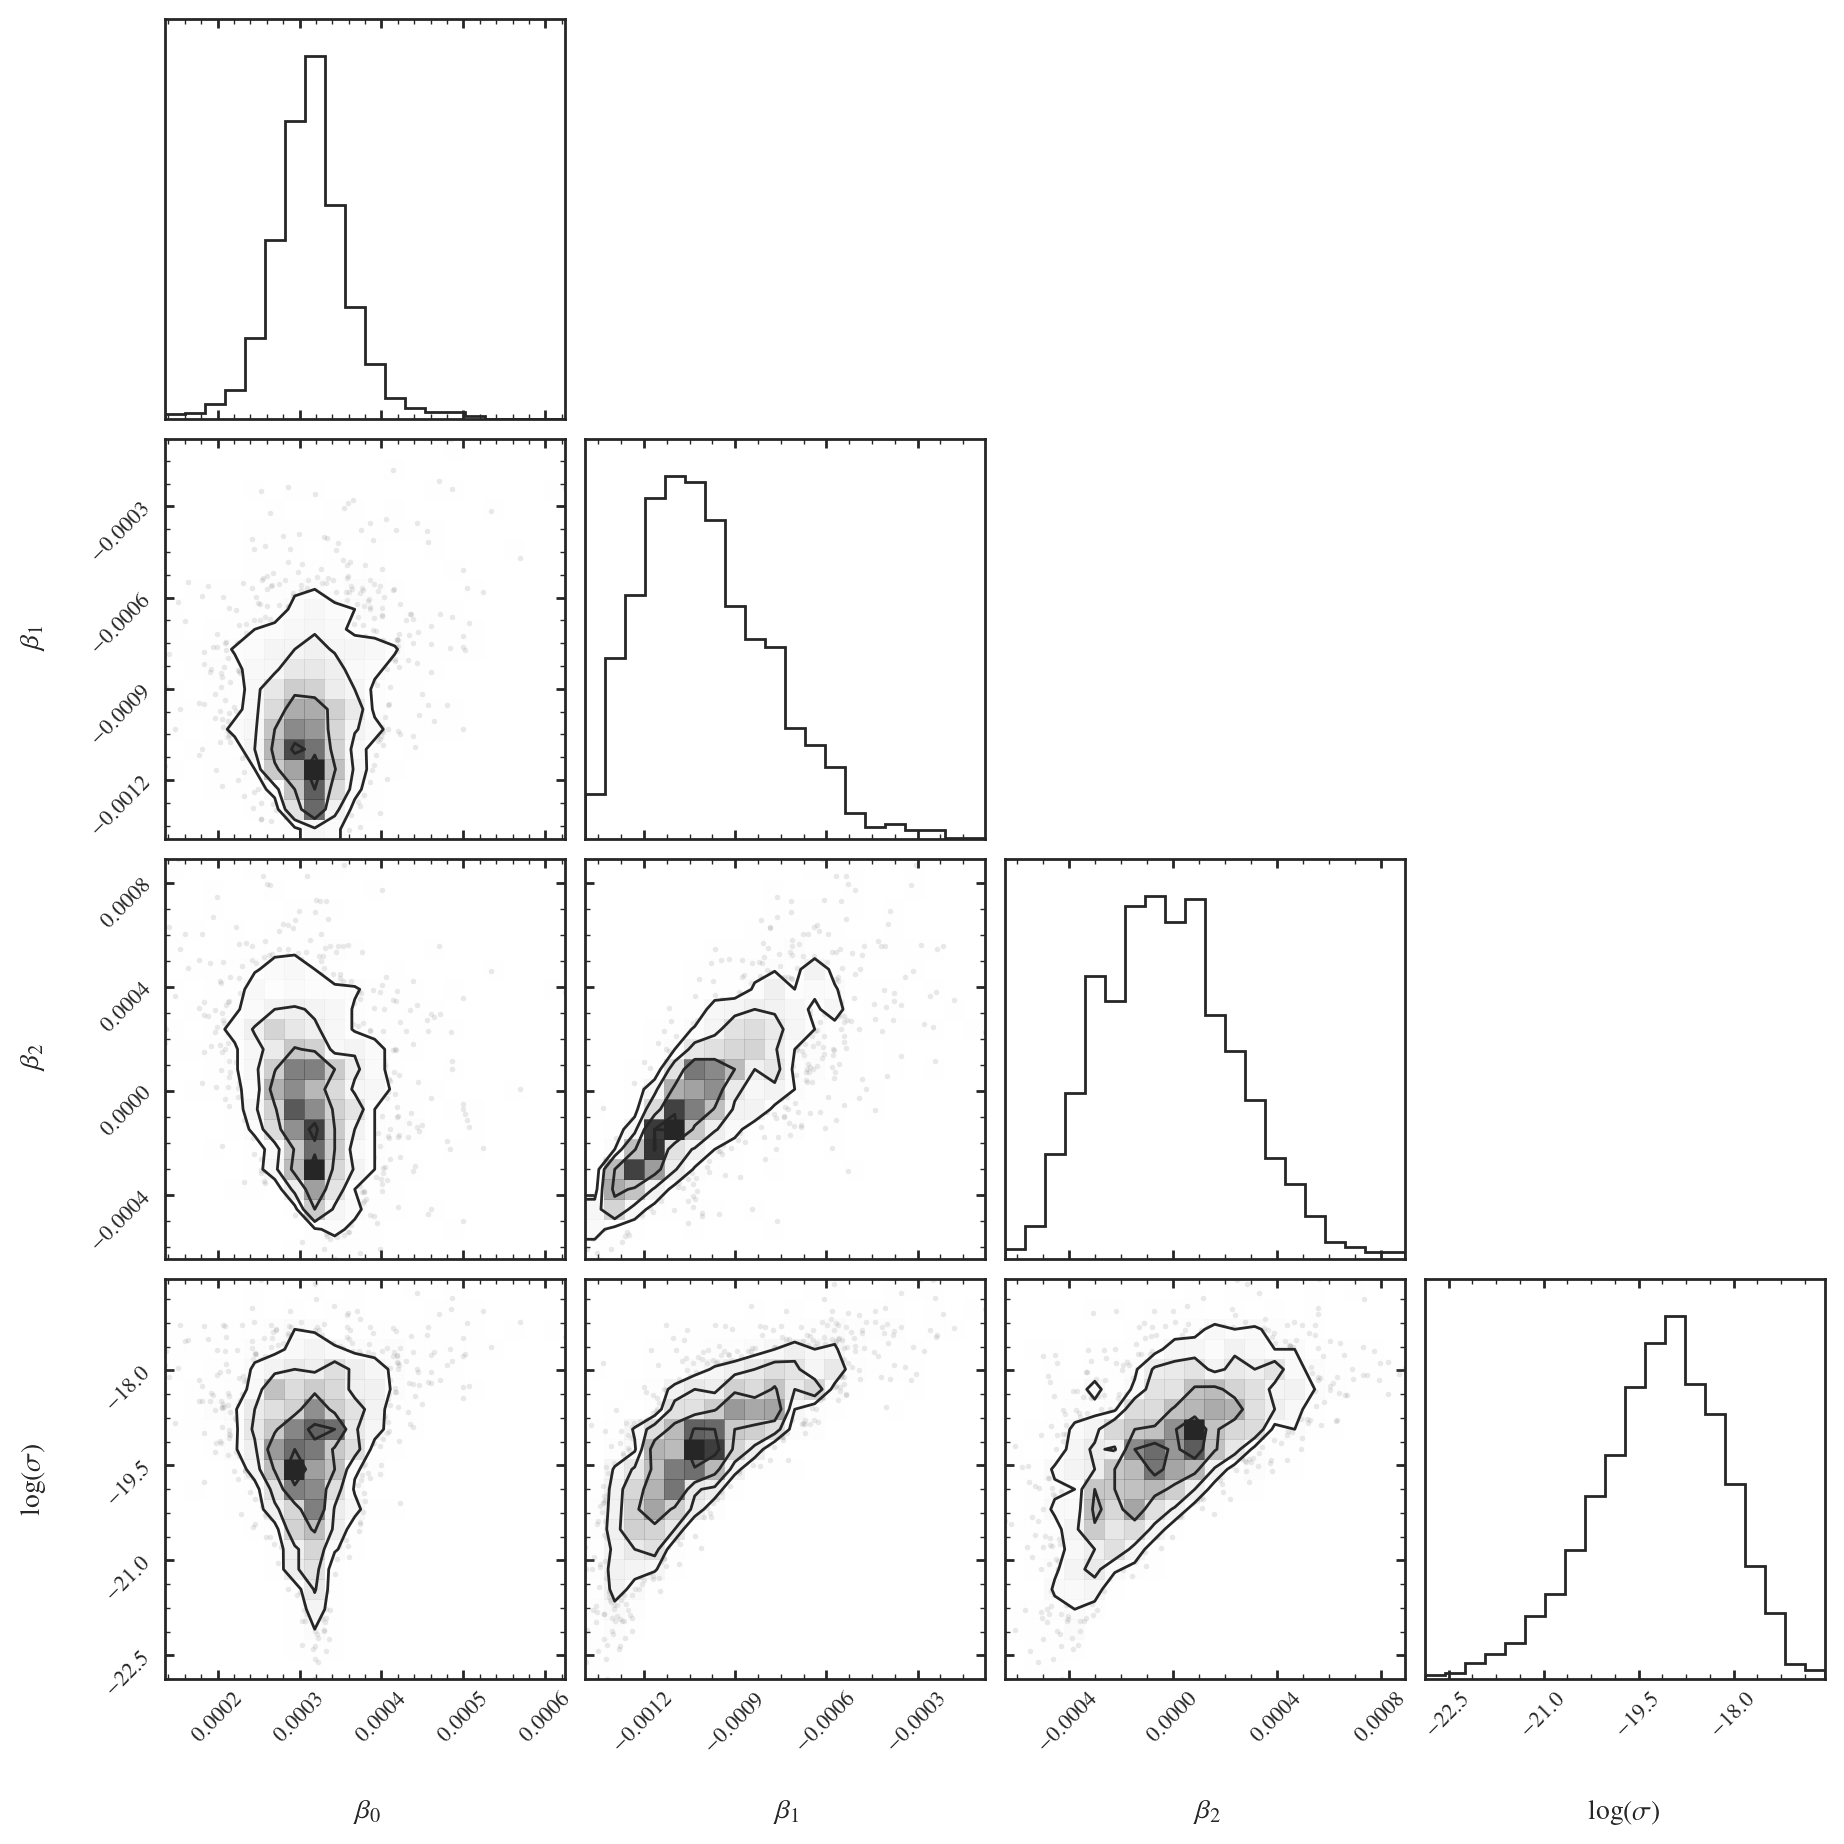

In [31]:
samples = mcmc_utils.run_mcmc(quad_model, obs, N=N, discard=discard)

$\beta_0$ = 3.12e-04 + 4.13e-05 - 4.17e-05
$\beta_1$ = -1.03e-03 + 1.75e-04 - 2.53e-04
$\beta_2$ = -3.08e-05 + 2.52e-04 - 2.74e-04
$\log(\sigma)$ = -1.91e+01 + 1.10e+00 - 9.43e-01


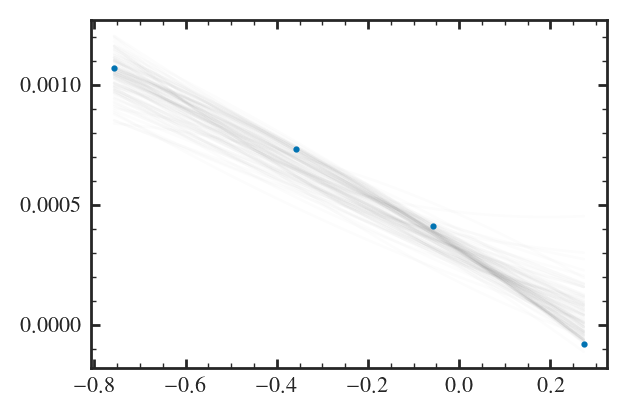

In [32]:
mcmc_utils.plot_posterior(quad_model, obs, samples)

100%|██████████| 3000/3000 [00:09<00:00, 309.44it/s]


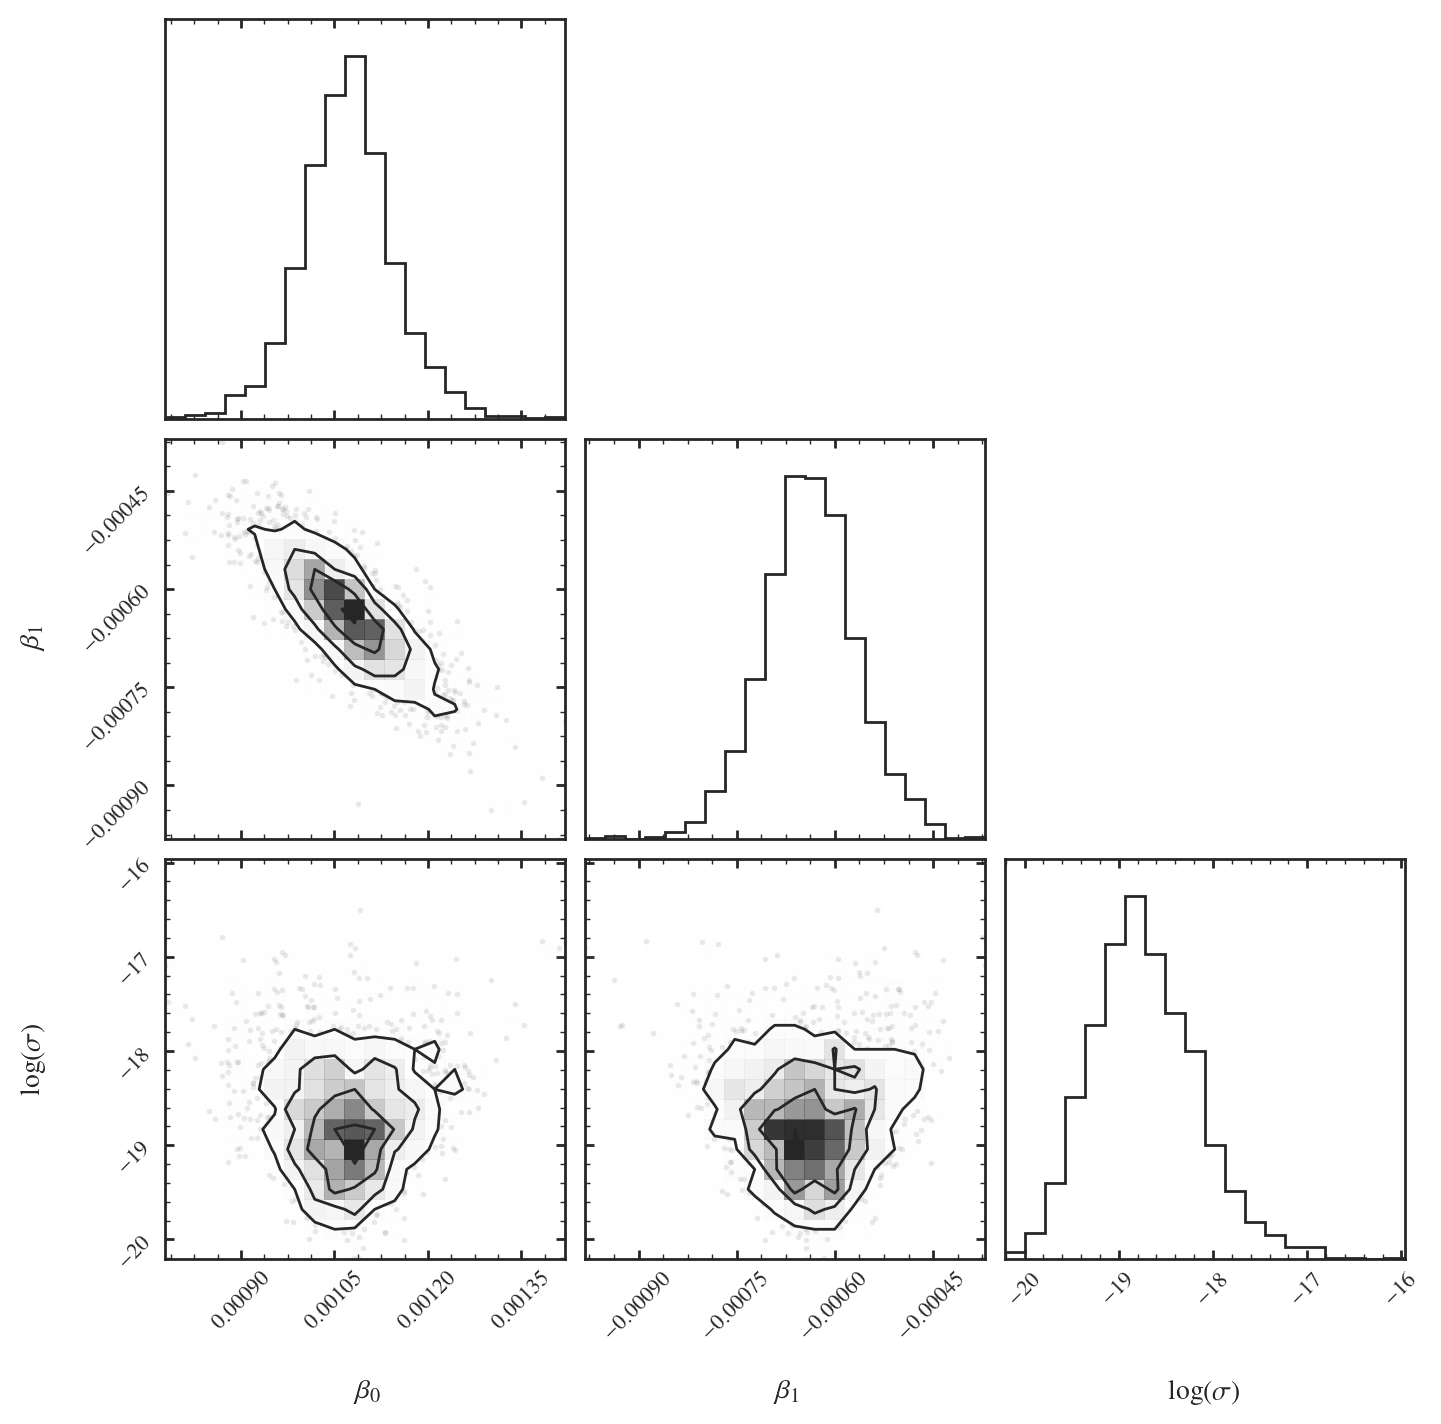

In [33]:
samples = mcmc_utils.run_mcmc(exp_model, obs, N=N, discard=discard)

$\beta_0$ = 1.07e-03 + 6.79e-05 - 6.83e-05
$\beta_1$ = -6.39e-04 + 6.78e-05 - 6.84e-05
$\log(\sigma)$ = -1.88e+01 + 5.11e-01 - 5.98e-01


(-0.001, 0.002)

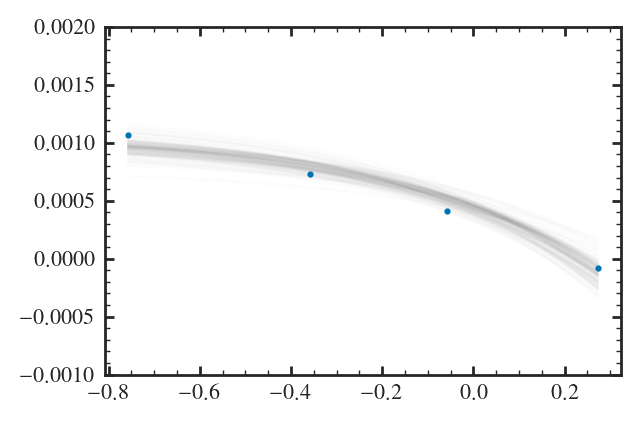

In [34]:
mcmc_utils.plot_posterior(exp_model, obs, samples)
plt.ylim(-1e-3, 2e-3)

# P16

In [35]:
obs = get_yield_table("pignatari16")

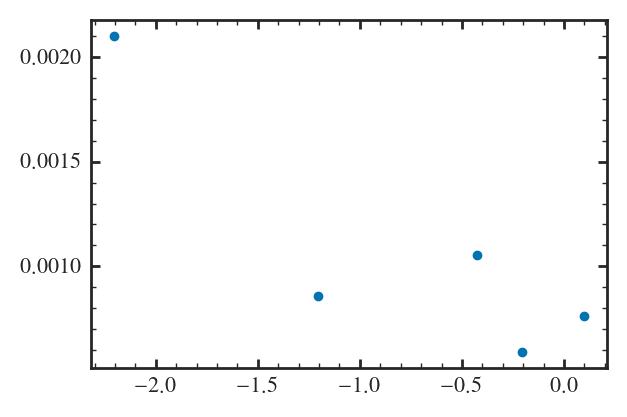

In [36]:
plt.scatter(obs[0], obs[1])

100%|██████████| 3000/3000 [00:09<00:00, 313.62it/s]


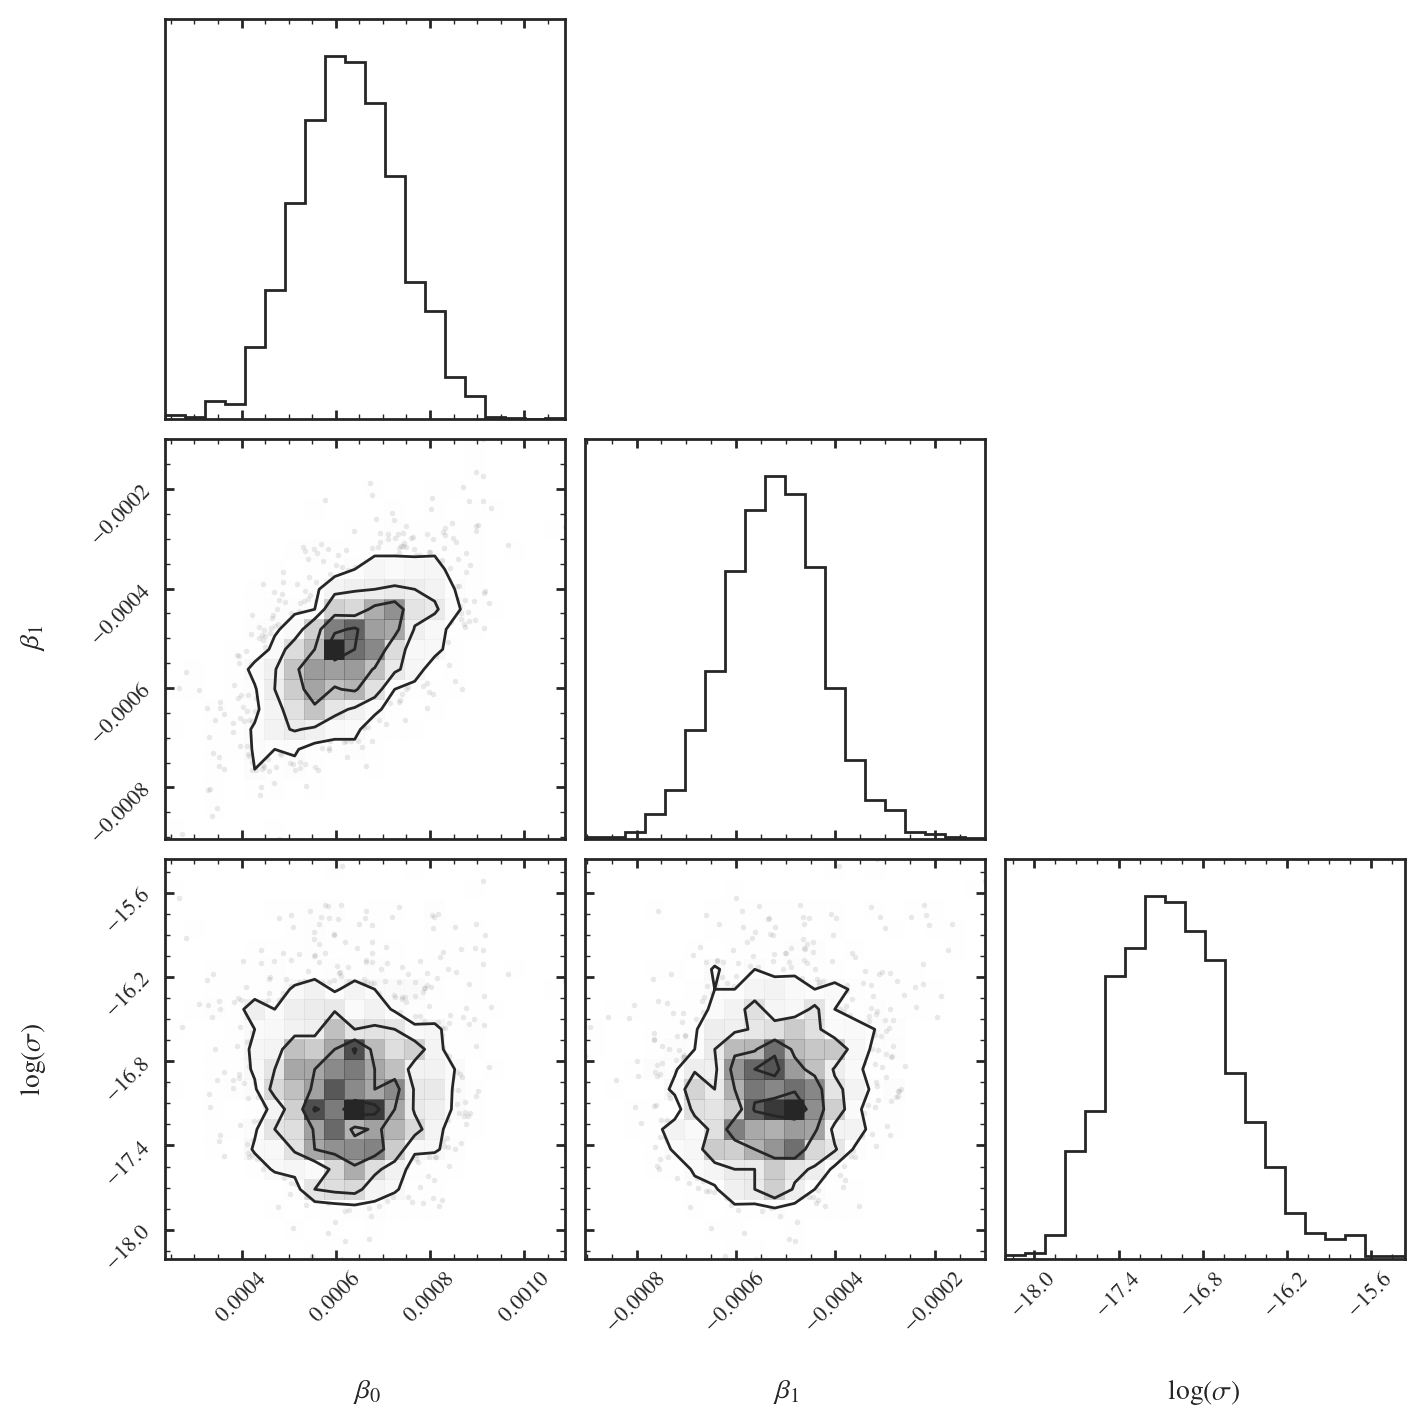

In [37]:
samples = mcmc_utils.run_mcmc(lin_model, obs, N=N, discard=discard)

$\beta_0$ = 6.25e-04 + 1.07e-04 - 1.08e-04
$\beta_1$ = -5.25e-04 + 9.86e-05 - 9.42e-05
$\log(\sigma)$ = -1.70e+01 + 3.96e-01 - 4.34e-01


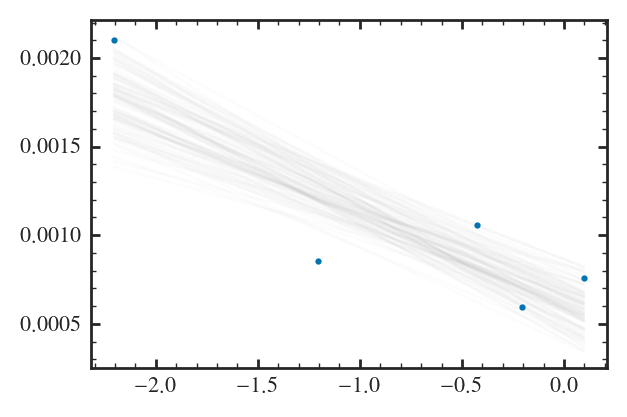

In [38]:
mcmc_utils.plot_posterior(lin_model, obs, samples)

100%|██████████| 3000/3000 [00:12<00:00, 248.07it/s]


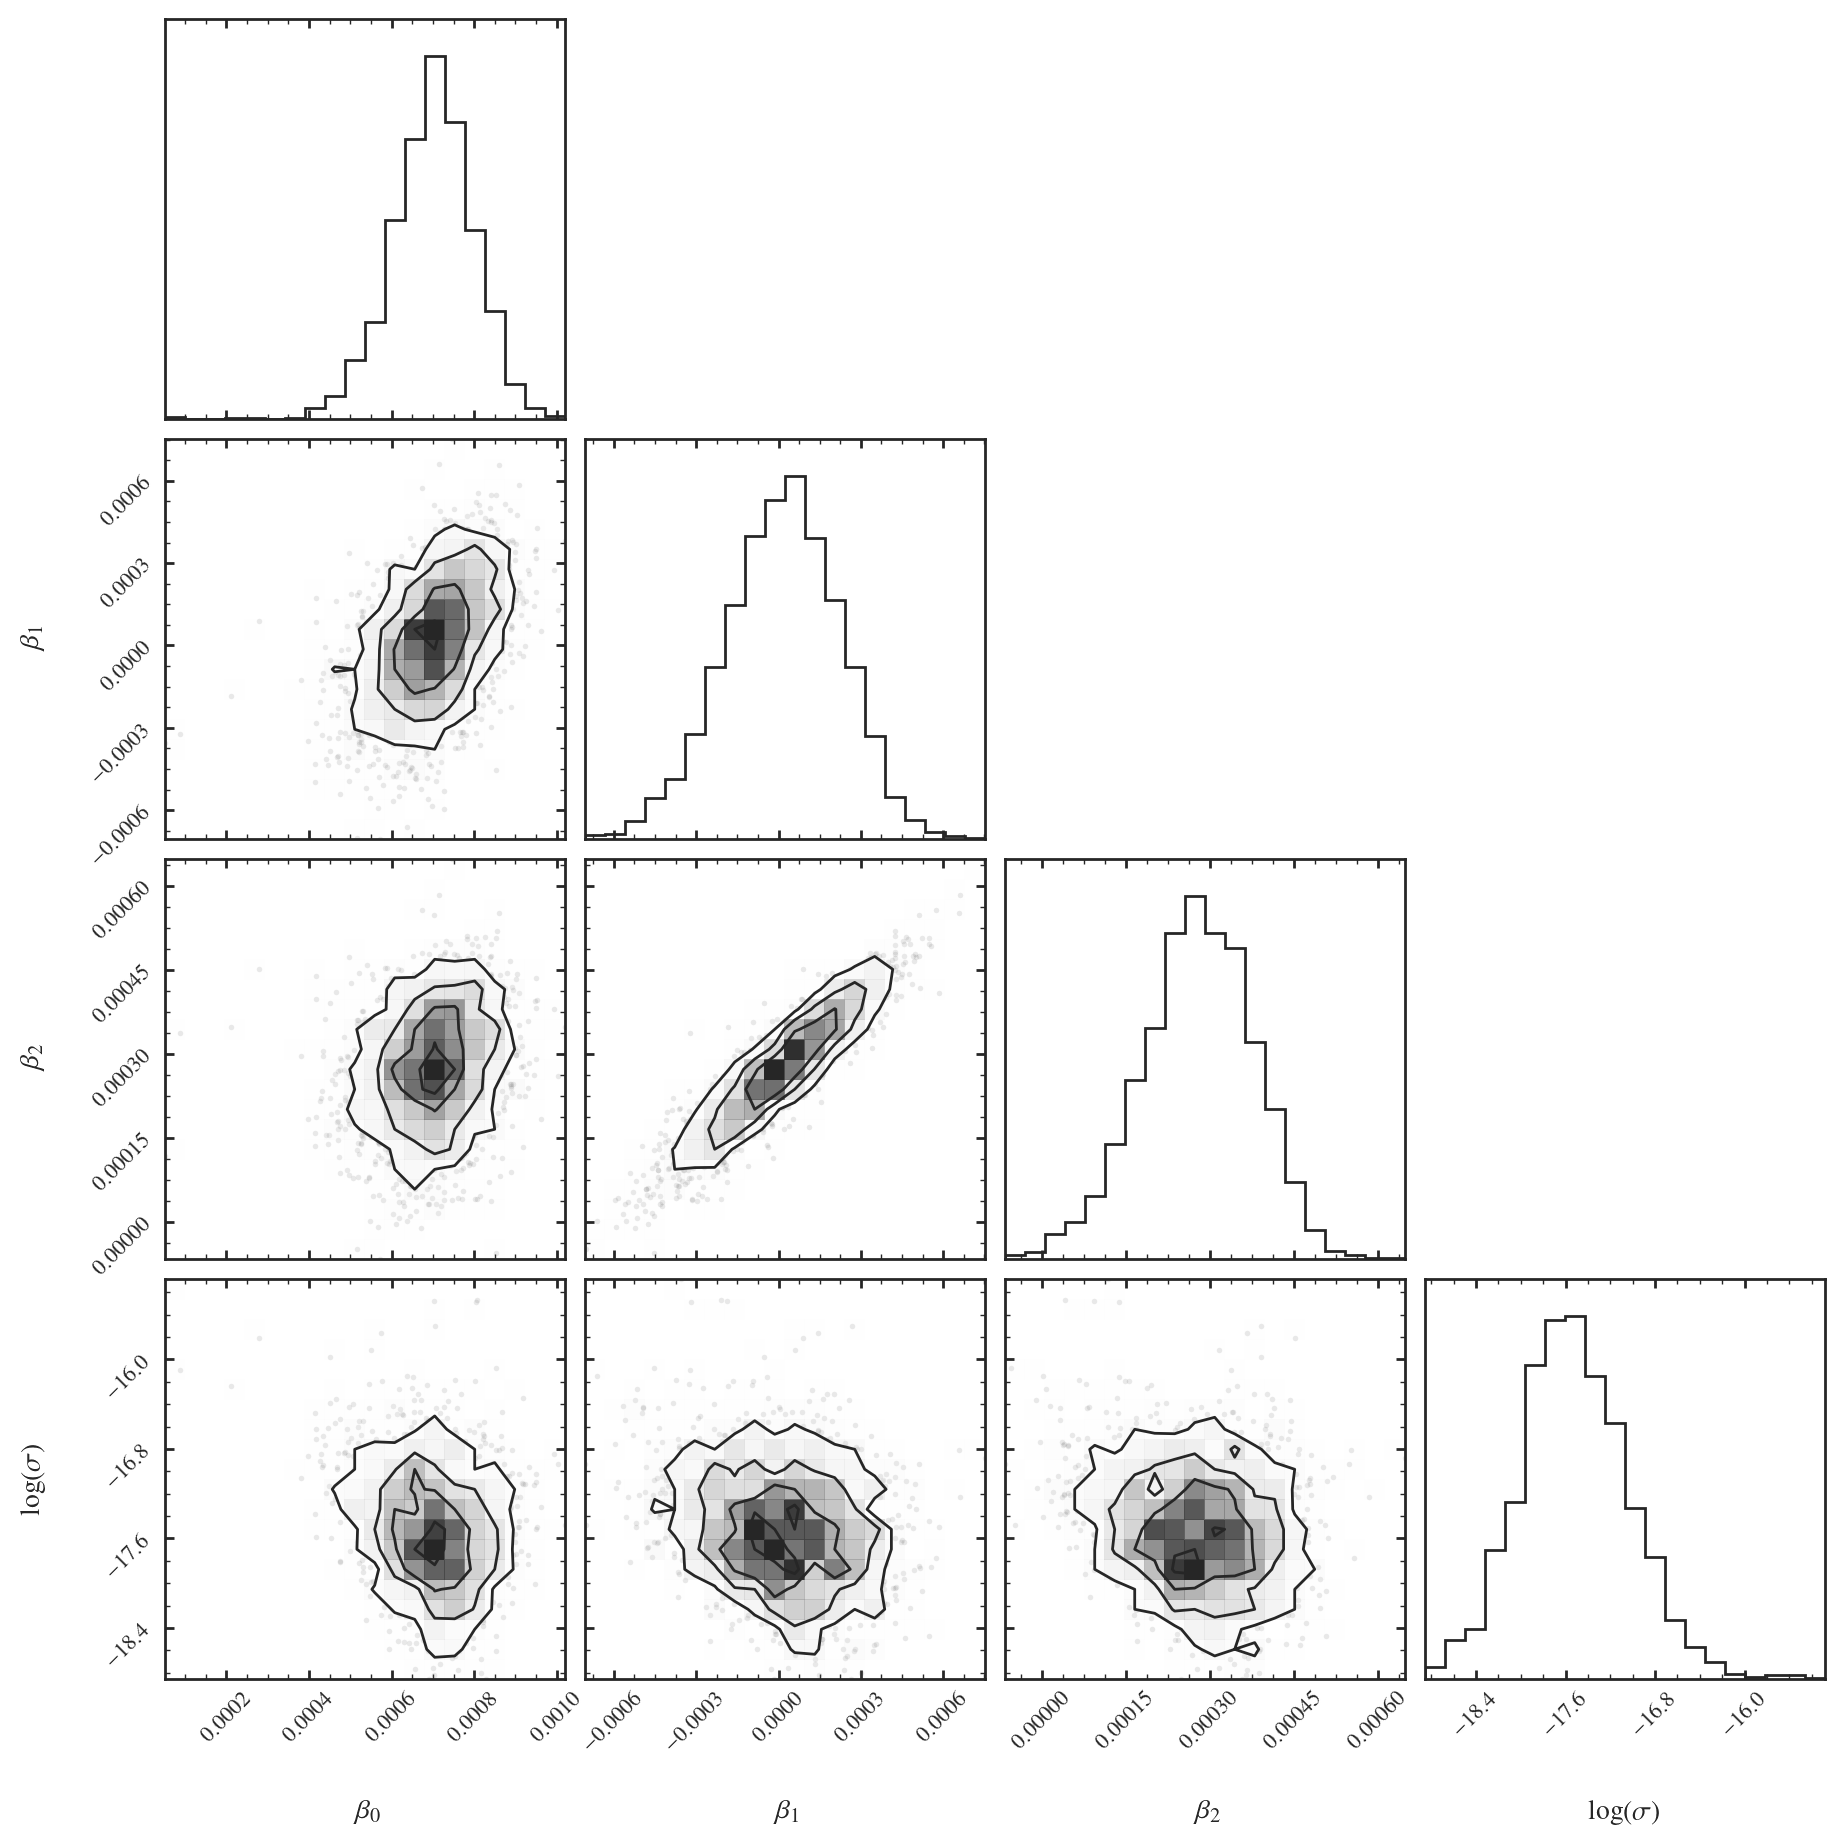

In [39]:
samples = mcmc_utils.run_mcmc(quad_model, obs, N=N, discard=discard)

$\beta_0$ = 7.02e-04 + 1.01e-04 - 8.96e-05
$\beta_1$ = 1.91e-05 + 2.15e-04 - 2.08e-04
$\beta_2$ = 2.79e-04 + 1.03e-04 - 9.58e-05
$\log(\sigma)$ = -1.75e+01 + 4.44e-01 - 5.03e-01


(-0.0003, 0.003)

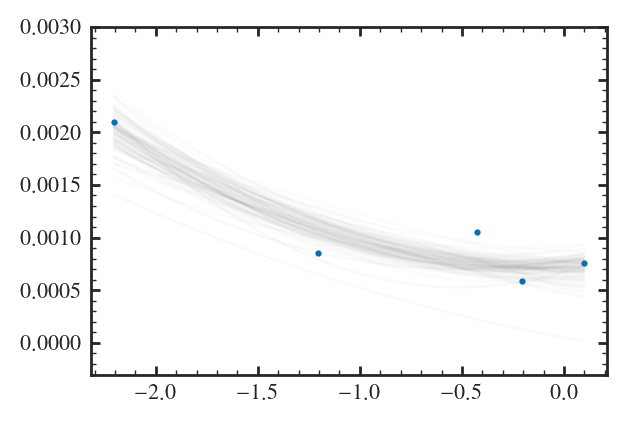

In [40]:
mcmc_utils.plot_posterior(quad_model, obs, samples)
plt.ylim(-0.3e-3, 3e-3)

In [ ]:
samples = mcmc_utils.run_mcmc(exp_model, obs, N=N, discard=discard)

 61%|██████    | 1824/3000 [00:05<00:03, 311.06it/s]

In [ ]:
mcmc_utils.plot_posterior(exp_model, obs, samples)
plt.ylim(-0.3e-3, 3e-3)